# Deep Probabilistice Generative Models - Final Project - GAN for Mnist

\- By Jiangnan HUANG & You ZUO

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import dataset_loader
import random

%matplotlib inline

In [137]:
# Download mnist dataset 
if("mnist.pkl.gz" not in os.listdir(".")):
    !wget http://deeplearning.net/data/mnist/mnist.pkl.gz

# if you have it somewhere else, you can comment the lines above
# and overwrite the path below
mnist_path = "./mnist.pkl.gz"

# the dataset contains 3 splits (train/dev/test),
# each one containing two vectors (pixels and classes)
(train_data_pixels, train_data_classes), \
(dev_data_pixels, dev_data_classes), _ = dataset_loader.load_mnist(mnist_path)

In [138]:
# this training set only contains images with number '4'. 
specific_train = []
for i in range(train_data_classes.shape[0]):
    if train_data_classes[i] == 4:
        specific_train.append(train_data_pixels[i])

specific_train = torch.from_numpy(np.array(specific_train)).float()

In [141]:
# dataset_loader return numpy tensors,
# we convert them directly to pytorch tensors
train_data_pixels = torch.from_numpy(train_data_pixels).float()
train_data_classes = torch.from_numpy(train_data_classes).long()

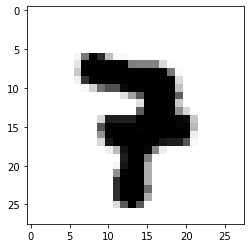

In [142]:
def display_images(images):
    # convert to numpy tensor
    images = images.detach().numpy()

    for i in range(images.shape[0]):
        plt.imshow(images[i].reshape(28,28), cmap='Greys')
        plt.show()
        
# display the 5 first image in the dataset
display_images(train_data_pixels[:1])


In [160]:
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        
        self.input_dim = input_dim
        
        self.stage = nn.Sequential( 
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            #nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            #nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, output_dim),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.stage(x)
        return x
    
    def sampler(self,n_samples):
        
        z = torch.empty(n_samples, self.input_dim)
        z = z.normal_()
        
        return z

In [161]:
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Discriminator, self).__init__()
        self.stage = nn.Sequential( 
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(),
            #nn.BatchNorm1d(hidden_dim),
            #nn.Dropout(0.5),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(),
            #nn.BatchNorm1d(hidden_dim),
            #nn.Dropout(0.5),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.stage(x)
        return x

epoch  0 : D real = 1.07233e-05 ,D fake = 0.000737231 ,D total loss = 0.0007479543 ; G loss =  0.0127164032


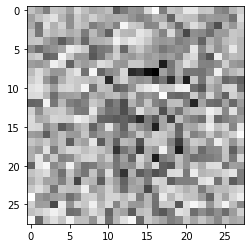

epoch  1 : D real = 9.58481e-05 ,D fake = 0.0001522397 ,D total loss = 0.0002480878 ; G loss =  0.0069855386


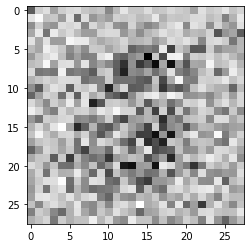

epoch  2 : D real = 0.000196598 ,D fake = 6.33792e-05 ,D total loss = 0.0002599772 ; G loss =  0.0172098018


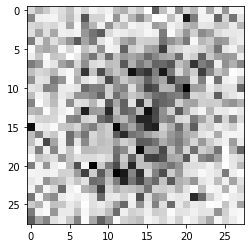

epoch  3 : D real = 0.0001732096 ,D fake = 0.0002403007 ,D total loss = 0.0004135103 ; G loss =  0.0027899635


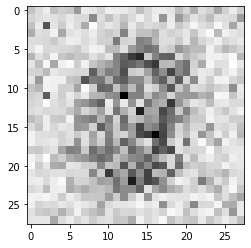

epoch  4 : D real = 0.0008474092 ,D fake = 0.0004113646 ,D total loss = 0.0012587738 ; G loss =  0.0113917999


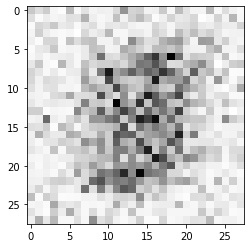

epoch  5 : D real = 0.0004411771 ,D fake = 0.0003962499 ,D total loss = 0.000837427 ; G loss =  0.000971719


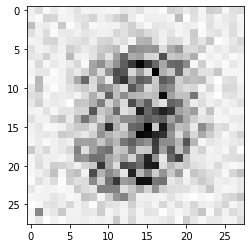

epoch  6 : D real = 0.001069656 ,D fake = 0.0009352717 ,D total loss = 0.0020049277 ; G loss =  0.0059013274


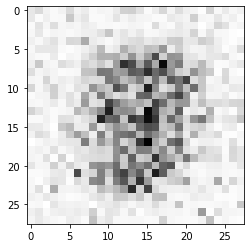

epoch  7 : D real = 0.0004776318 ,D fake = 0.0005833529 ,D total loss = 0.0010609846999999999 ; G loss =  0.0007733895


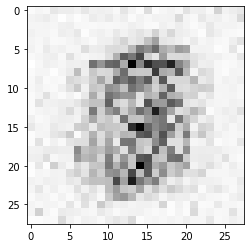

epoch  8 : D real = 0.0008826613 ,D fake = 0.0020561186 ,D total loss = 0.0029387799 ; G loss =  0.0051797768


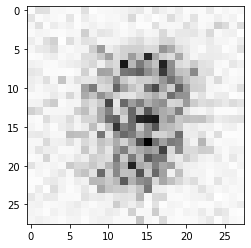

epoch  9 : D real = 0.0010577521 ,D fake = 0.0018866193 ,D total loss = 0.0029443714 ; G loss =  0.000352883


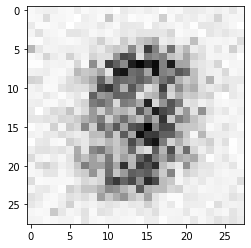

epoch  10 : D real = 0.000586353 ,D fake = 0.0018089879 ,D total loss = 0.0023953409 ; G loss =  0.0051734615


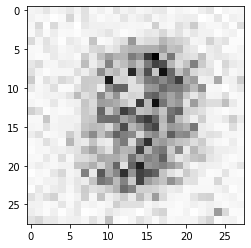

epoch  11 : D real = 0.0004930989 ,D fake = 0.0010325692 ,D total loss = 0.0015256681 ; G loss =  0.0002142519


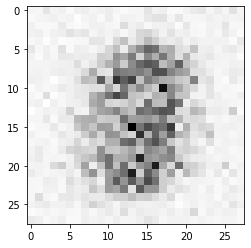

epoch  12 : D real = 0.0024944148 ,D fake = 0.0011994037 ,D total loss = 0.0036938185000000004 ; G loss =  0.0064997026


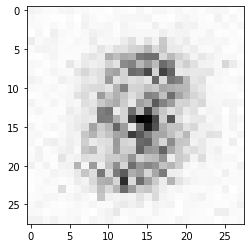

epoch  13 : D real = 0.0023818589 ,D fake = 0.0020970011 ,D total loss = 0.0044788599999999994 ; G loss =  0.0004355864


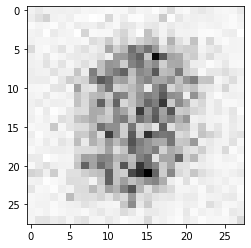

epoch  14 : D real = 0.002386556 ,D fake = 0.0040546465 ,D total loss = 0.0064412025 ; G loss =  0.0105811376


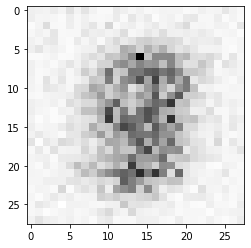

epoch  15 : D real = 0.0075646108 ,D fake = 0.0072686262 ,D total loss = 0.014833236999999999 ; G loss =  0.0006288454


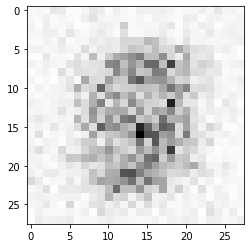

epoch  16 : D real = 0.0023948459 ,D fake = 0.0025651313 ,D total loss = 0.0049599772 ; G loss =  0.0050585731


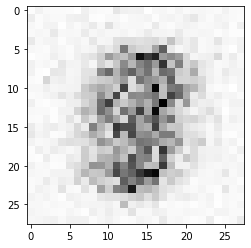

epoch  17 : D real = 0.0021335816 ,D fake = 0.0030591595 ,D total loss = 0.0051927411 ; G loss =  9.0611e-06


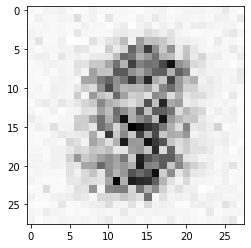

epoch  18 : D real = 0.0026046687 ,D fake = 0.0041034357 ,D total loss = 0.0067081044 ; G loss =  0.0008983107


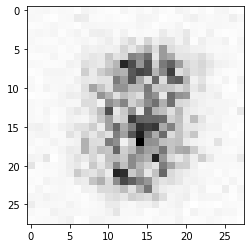

epoch  19 : D real = 0.0118383951 ,D fake = 0.014646248 ,D total loss = 0.0264846431 ; G loss =  0.0003489658


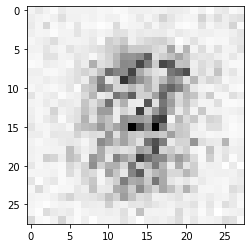

epoch  20 : D real = 0.0081326421 ,D fake = 0.0129700238 ,D total loss = 0.021102665899999998 ; G loss =  0.0117841177


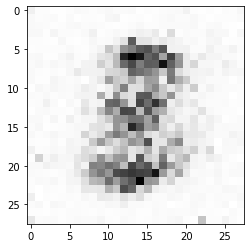

epoch  21 : D real = 0.0220167041 ,D fake = 0.0413994007 ,D total loss = 0.0634161048 ; G loss =  0.0009505401


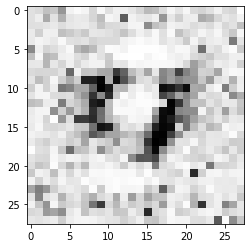

epoch  22 : D real = 0.0088641867 ,D fake = 0.0086397231 ,D total loss = 0.017503909800000002 ; G loss =  0.0005656558


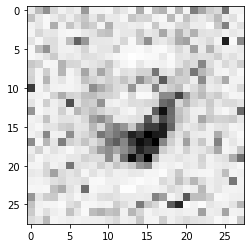

epoch  23 : D real = 0.0028592851 ,D fake = 0.0049386113 ,D total loss = 0.0077978964000000005 ; G loss =  0.0008895475


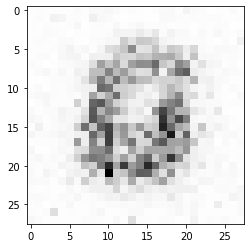

epoch  24 : D real = 0.005175218 ,D fake = 0.0051445183 ,D total loss = 0.0103197363 ; G loss =  0.0033086301


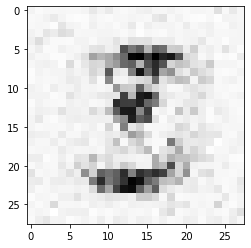

epoch  25 : D real = 0.0116348919 ,D fake = 0.005313308 ,D total loss = 0.0169481999 ; G loss =  0.0050785774


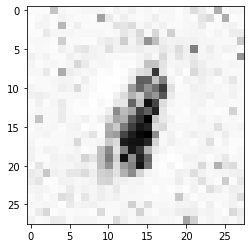

epoch  26 : D real = 0.0139908129 ,D fake = 0.0127974749 ,D total loss = 0.026788287799999998 ; G loss =  0.0076850513


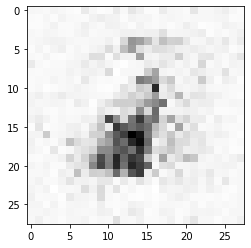

epoch  27 : D real = 0.0038209159 ,D fake = 0.0139944572 ,D total loss = 0.0178153731 ; G loss =  0.0043628323


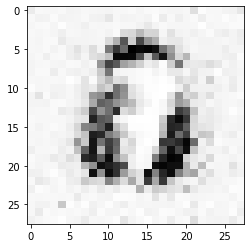

epoch  28 : D real = 0.0060515376 ,D fake = 0.0082771014 ,D total loss = 0.014328639 ; G loss =  0.0033836081


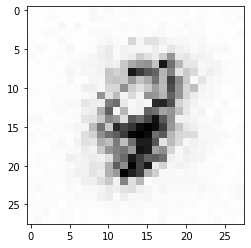

epoch  29 : D real = 0.0022203401 ,D fake = 0.008006121 ,D total loss = 0.0102264611 ; G loss =  0.0036661096


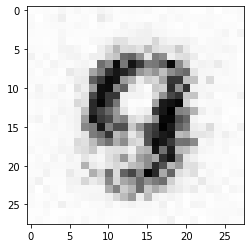

epoch  30 : D real = 0.0051985439 ,D fake = 0.0061002732 ,D total loss = 0.0112988171 ; G loss =  0.001443178


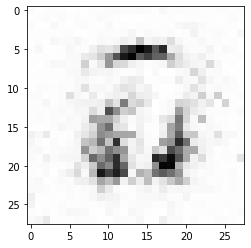

epoch  31 : D real = 0.0051910747 ,D fake = 0.0067215879 ,D total loss = 0.0119126626 ; G loss =  0.0025614863


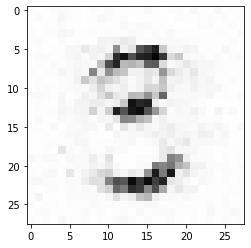

epoch  32 : D real = 0.0072024586 ,D fake = 0.0067547555 ,D total loss = 0.0139572141 ; G loss =  0.0057778447


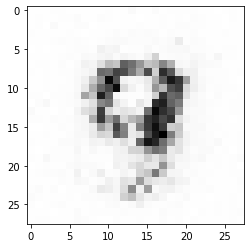

epoch  33 : D real = 0.0034412011 ,D fake = 0.0085899383 ,D total loss = 0.012031139400000002 ; G loss =  0.0019445445


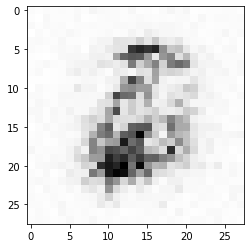

epoch  34 : D real = 0.0069130324 ,D fake = 0.0116098905 ,D total loss = 0.0185229229 ; G loss =  0.0057499544


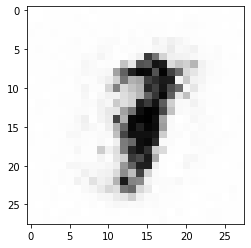

epoch  35 : D real = 0.0129750296 ,D fake = 0.0033479724 ,D total loss = 0.016323002 ; G loss =  0.0045787198


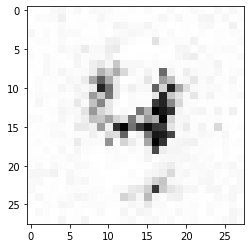

epoch  36 : D real = 0.0120691266 ,D fake = 0.009974706 ,D total loss = 0.0220438326 ; G loss =  0.0019086683


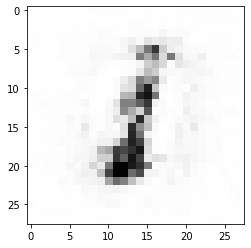

epoch  37 : D real = 0.0094472999 ,D fake = 0.0142305046 ,D total loss = 0.0236778045 ; G loss =  0.0056815082


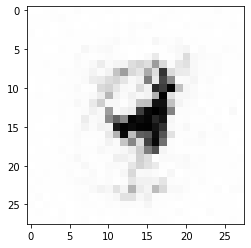

epoch  38 : D real = 0.0198455714 ,D fake = 0.0103431633 ,D total loss = 0.0301887347 ; G loss =  0.0049091019


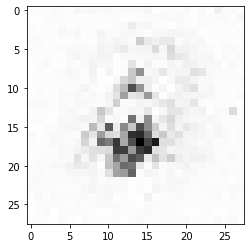

epoch  39 : D real = 0.0298397727 ,D fake = 0.0272478629 ,D total loss = 0.0570876356 ; G loss =  0.0157578271


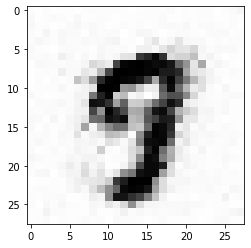

epoch  40 : D real = 0.0206832141 ,D fake = 0.0195656344 ,D total loss = 0.040248848500000003 ; G loss =  0.0111164367


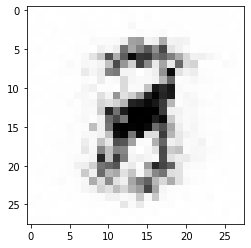

epoch  41 : D real = 0.0154638654 ,D fake = 0.0303382892 ,D total loss = 0.0458021546 ; G loss =  0.009620728


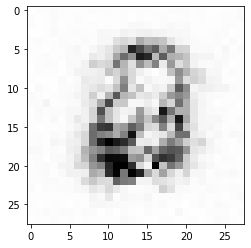

epoch  42 : D real = 0.0375763886 ,D fake = 0.0299302712 ,D total loss = 0.06750665980000001 ; G loss =  0.0088956002


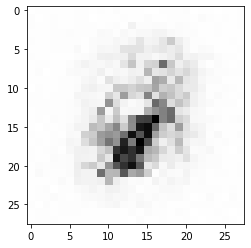

epoch  43 : D real = 0.0247399714 ,D fake = 0.013436825 ,D total loss = 0.038176796400000004 ; G loss =  0.0174124204


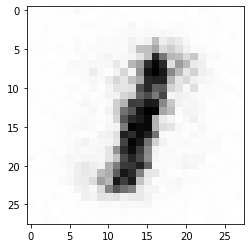

epoch  44 : D real = 0.0227348264 ,D fake = 0.0341510996 ,D total loss = 0.056885926 ; G loss =  0.0058580469


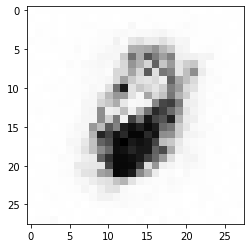

epoch  45 : D real = 0.0209864154 ,D fake = 0.0111387148 ,D total loss = 0.0321251302 ; G loss =  0.0104259476


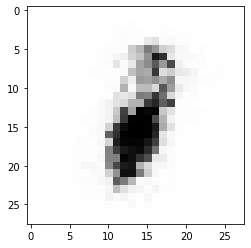

epoch  46 : D real = 0.0512969941 ,D fake = 0.0186578035 ,D total loss = 0.06995479760000001 ; G loss =  0.0024776505


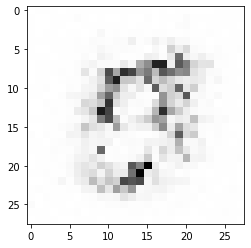

epoch  47 : D real = 0.0058233463 ,D fake = 0.017236948 ,D total loss = 0.0230602943 ; G loss =  0.0103826048


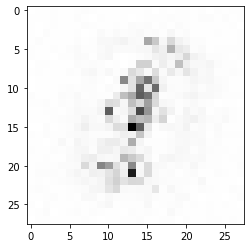

epoch  48 : D real = 0.0250656456 ,D fake = 0.0242077745 ,D total loss = 0.0492734201 ; G loss =  0.0147839636


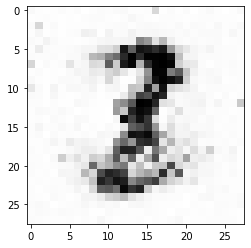

epoch  49 : D real = 0.0394032523 ,D fake = 0.0065171048 ,D total loss = 0.045920357099999996 ; G loss =  0.0170890074


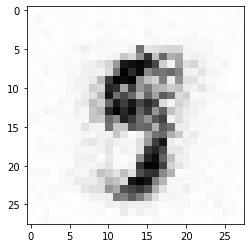

epoch  50 : D real = 0.0145575088 ,D fake = 0.0188952293 ,D total loss = 0.033452738100000004 ; G loss =  0.0020915424


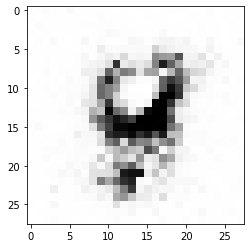

epoch  51 : D real = 0.0109046604 ,D fake = 0.0139089217 ,D total loss = 0.024813582100000002 ; G loss =  0.012982944


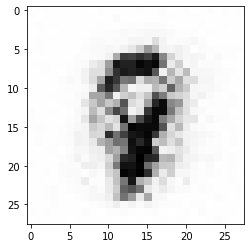

epoch  52 : D real = 0.0368770286 ,D fake = 0.0491780266 ,D total loss = 0.08605505520000001 ; G loss =  0.0153017733


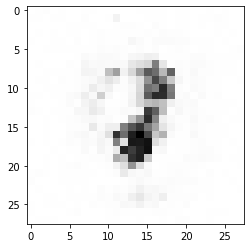

epoch  53 : D real = 0.0192069151 ,D fake = 0.0078149969 ,D total loss = 0.027021912 ; G loss =  0.0266853627


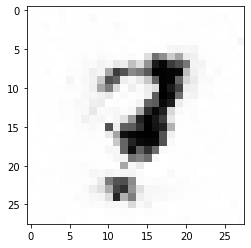

epoch  54 : D real = 0.0456311144 ,D fake = 0.0577920675 ,D total loss = 0.1034231819 ; G loss =  0.0279502477


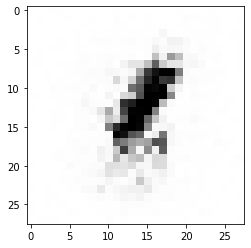

epoch  55 : D real = 0.0295598283 ,D fake = 0.0174377654 ,D total loss = 0.0469975937 ; G loss =  0.0293985847


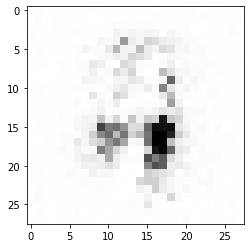

epoch  56 : D real = 0.0502631441 ,D fake = 0.0178162344 ,D total loss = 0.0680793785 ; G loss =  0.0036344777


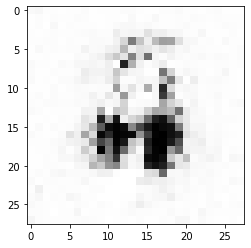

epoch  57 : D real = 0.0148733202 ,D fake = 0.0086707966 ,D total loss = 0.0235441168 ; G loss =  0.0067124567


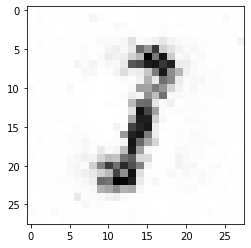

epoch  58 : D real = 0.0093931286 ,D fake = 0.0116650248 ,D total loss = 0.0210581534 ; G loss =  0.0042490214


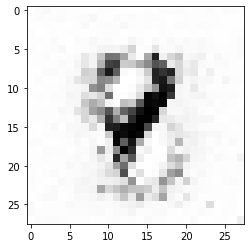

epoch  59 : D real = 0.005566895 ,D fake = 0.0083111599 ,D total loss = 0.013878054899999999 ; G loss =  0.0061777104


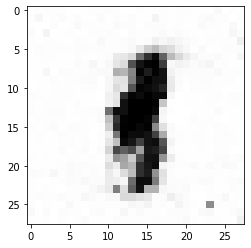

epoch  60 : D real = 0.0203885101 ,D fake = 0.0299676545 ,D total loss = 0.0503561646 ; G loss =  0.0211678259


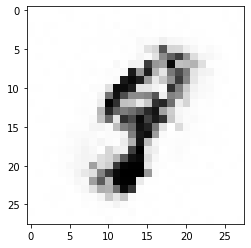

epoch  61 : D real = 0.0353813842 ,D fake = 0.0345826671 ,D total loss = 0.0699640513 ; G loss =  0.0301391538


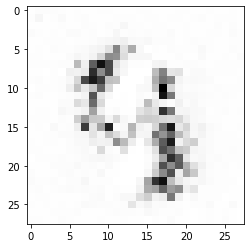

epoch  62 : D real = 0.0210045949 ,D fake = 0.0159257036 ,D total loss = 0.0369302985 ; G loss =  0.0067539727


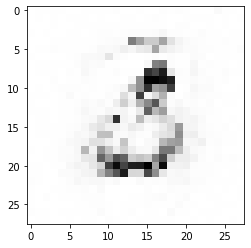

epoch  63 : D real = 0.0302512459 ,D fake = 0.0076332963 ,D total loss = 0.0378845422 ; G loss =  0.0255768038


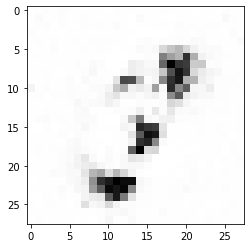

epoch  64 : D real = 0.0261359904 ,D fake = 0.0141332522 ,D total loss = 0.0402692426 ; G loss =  0.0183407795


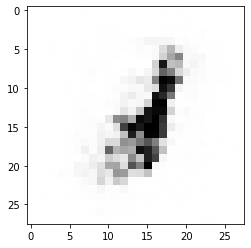

epoch  65 : D real = 0.0071658604 ,D fake = 0.014343394 ,D total loss = 0.0215092544 ; G loss =  0.009127955


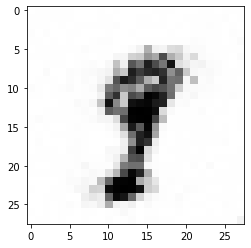

epoch  66 : D real = 0.0216830056 ,D fake = 0.0241926834 ,D total loss = 0.045875689 ; G loss =  0.0169051997


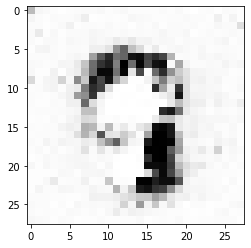

epoch  67 : D real = 0.0101834778 ,D fake = 0.0033440061 ,D total loss = 0.0135274839 ; G loss =  0.0174260326


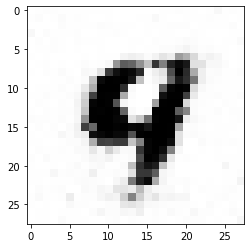

epoch  68 : D real = 0.0193712339 ,D fake = 0.0143455714 ,D total loss = 0.0337168053 ; G loss =  0.0305063929


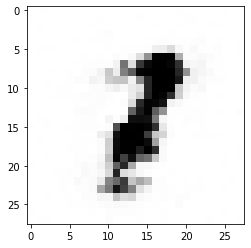

epoch  69 : D real = 0.0253216419 ,D fake = 0.008783943 ,D total loss = 0.0341055849 ; G loss =  0.0271886699


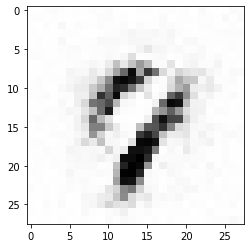

epoch  70 : D real = 0.0072901389 ,D fake = 0.0129656475 ,D total loss = 0.0202557864 ; G loss =  0.0014871947


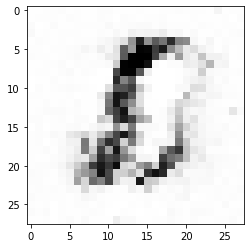

epoch  71 : D real = 0.0244979654 ,D fake = 0.0121057155 ,D total loss = 0.0366036809 ; G loss =  0.0239824038


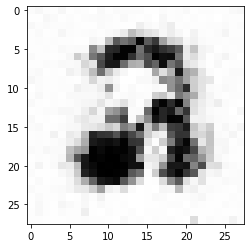

epoch  72 : D real = 0.0195602719 ,D fake = 0.0138134547 ,D total loss = 0.0333737266 ; G loss =  0.0221076347


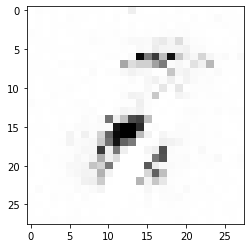

epoch  73 : D real = 0.0081530428 ,D fake = 0.010609515 ,D total loss = 0.0187625578 ; G loss =  0.0077157533


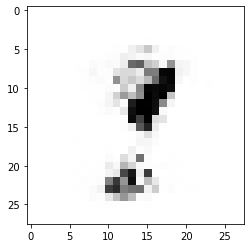

epoch  74 : D real = 0.0244879182 ,D fake = 0.0551485009 ,D total loss = 0.0796364191 ; G loss =  0.0304124542


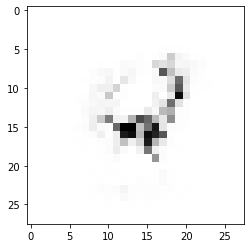

epoch  75 : D real = 0.0550034456 ,D fake = 0.0175032783 ,D total loss = 0.0725067239 ; G loss =  0.0260480102


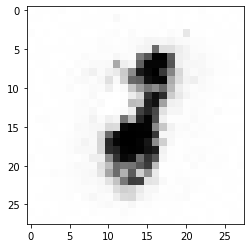

epoch  76 : D real = 0.0226174016 ,D fake = 0.0054758615 ,D total loss = 0.0280932631 ; G loss =  0.0320582651


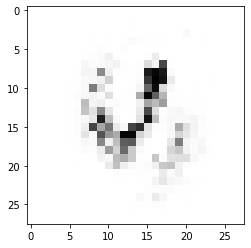

epoch  77 : D real = 0.033734709 ,D fake = 0.0318560265 ,D total loss = 0.0655907355 ; G loss =  0.0282283332


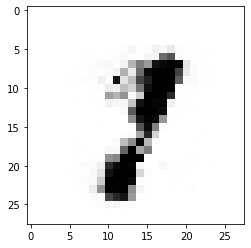

epoch  78 : D real = 0.0128043965 ,D fake = 0.0028278809 ,D total loss = 0.015632277400000002 ; G loss =  0.0145037677


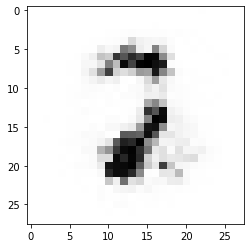

epoch  79 : D real = 0.0368493944 ,D fake = 0.0542012528 ,D total loss = 0.0910506472 ; G loss =  0.0442823172


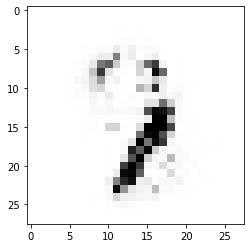

epoch  80 : D real = 0.0143876607 ,D fake = 0.032162603 ,D total loss = 0.0465502637 ; G loss =  0.0191269889


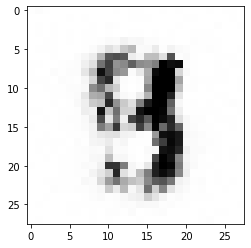

epoch  81 : D real = 0.031310223 ,D fake = 0.0176976286 ,D total loss = 0.0490078516 ; G loss =  0.0174667612


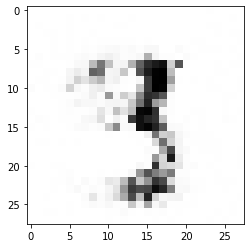

epoch  82 : D real = 0.0118218865 ,D fake = 0.0229745414 ,D total loss = 0.034796427899999996 ; G loss =  0.0322032198


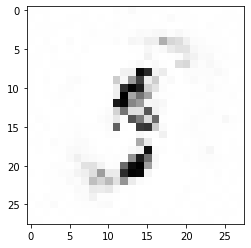

epoch  83 : D real = 0.0173328798 ,D fake = 0.0286972634 ,D total loss = 0.0460301432 ; G loss =  0.0619941577


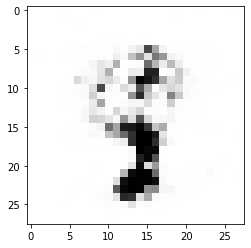

epoch  84 : D real = 0.0250860341 ,D fake = 0.0181486066 ,D total loss = 0.0432346407 ; G loss =  0.0360712782


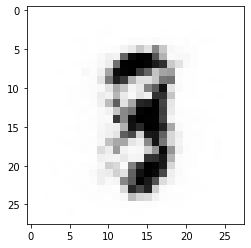

epoch  85 : D real = 0.0134670502 ,D fake = 0.0213732813 ,D total loss = 0.0348403315 ; G loss =  0.0406081378


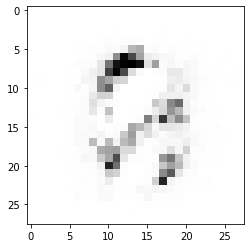

epoch  86 : D real = 0.0488878079 ,D fake = 0.0240159761 ,D total loss = 0.072903784 ; G loss =  0.0596056059


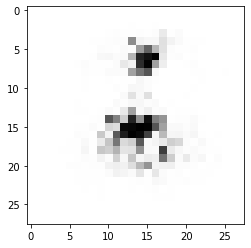

epoch  87 : D real = 0.0272863731 ,D fake = 0.0088863177 ,D total loss = 0.036172690800000004 ; G loss =  0.0104496265


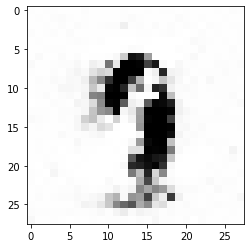

epoch  88 : D real = 0.0047293864 ,D fake = 0.0286256559 ,D total loss = 0.0333550423 ; G loss =  0.015320668


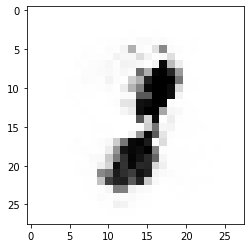

epoch  89 : D real = 0.0255164225 ,D fake = 0.0222755168 ,D total loss = 0.0477919393 ; G loss =  0.0309894886


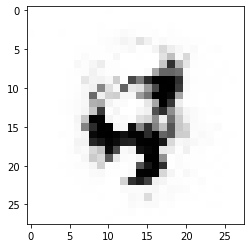

epoch  90 : D real = 0.0469358526 ,D fake = 0.0215902571 ,D total loss = 0.0685261097 ; G loss =  0.009331313


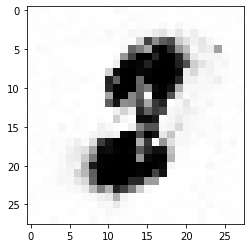

epoch  91 : D real = 0.0242827926 ,D fake = 0.0207576379 ,D total loss = 0.0450404305 ; G loss =  0.0116442796


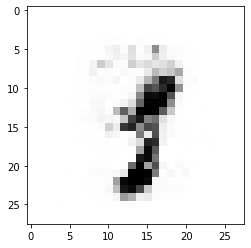

epoch  92 : D real = 0.0122032948 ,D fake = 0.0284302384 ,D total loss = 0.0406335332 ; G loss =  0.0224196929


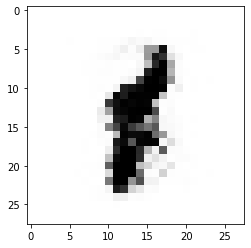

epoch  93 : D real = 0.0512383059 ,D fake = 0.0340099335 ,D total loss = 0.08524823940000001 ; G loss =  0.0552852675


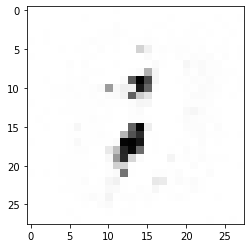

epoch  94 : D real = 0.015486843 ,D fake = 0.0155402534 ,D total loss = 0.031027096400000002 ; G loss =  0.0515785031


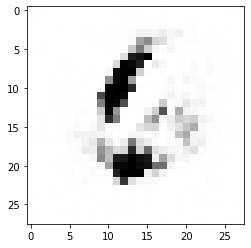

epoch  95 : D real = 0.0580747463 ,D fake = 0.0364045985 ,D total loss = 0.0944793448 ; G loss =  0.0486770645


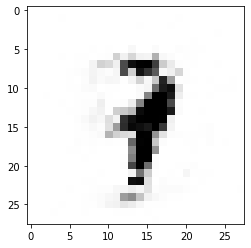

epoch  96 : D real = 0.0227471981 ,D fake = 0.0170172751 ,D total loss = 0.0397644732 ; G loss =  0.0587667152


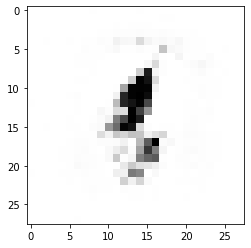

epoch  97 : D real = 0.0160950944 ,D fake = 0.0135798017 ,D total loss = 0.0296748961 ; G loss =  0.0229810532


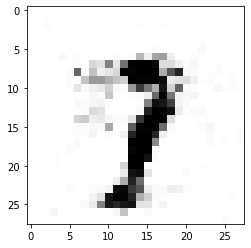

epoch  98 : D real = 0.0261967592 ,D fake = 0.0243847575 ,D total loss = 0.050581516699999995 ; G loss =  0.0422681794


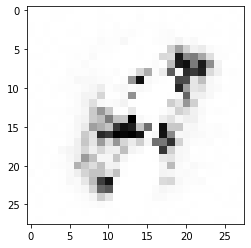

epoch  99 : D real = 0.0290382765 ,D fake = 0.0214740206 ,D total loss = 0.050512297100000006 ; G loss =  0.0398689285


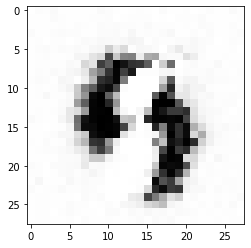

epoch  100 : D real = 0.0417782962 ,D fake = 0.0121557666 ,D total loss = 0.0539340628 ; G loss =  0.0360401496


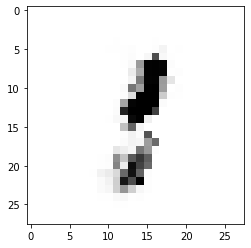

epoch  101 : D real = 0.0135981999 ,D fake = 0.0123801194 ,D total loss = 0.0259783193 ; G loss =  0.0810226649


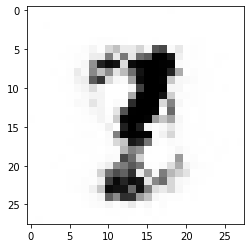

epoch  102 : D real = 0.0114707034 ,D fake = 0.0094307084 ,D total loss = 0.0209014118 ; G loss =  0.0119006634


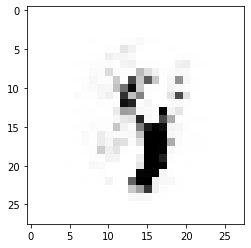

epoch  103 : D real = 0.015843872 ,D fake = 0.0052174744 ,D total loss = 0.0210613464 ; G loss =  0.016885547


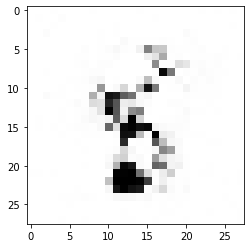

epoch  104 : D real = 0.0156297479 ,D fake = 0.0049070609 ,D total loss = 0.0205368088 ; G loss =  0.0043011894


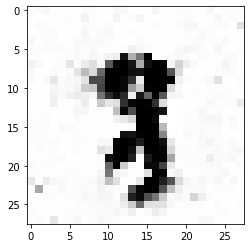

epoch  105 : D real = 0.0212530084 ,D fake = 0.0099033331 ,D total loss = 0.031156341499999997 ; G loss =  0.0330622494


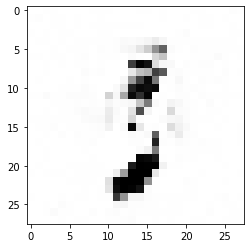

epoch  106 : D real = 0.0264130272 ,D fake = 0.0363313146 ,D total loss = 0.06274434179999999 ; G loss =  0.0789035112


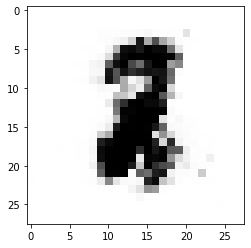

epoch  107 : D real = 0.0229855292 ,D fake = 0.0159474481 ,D total loss = 0.038932977300000005 ; G loss =  0.0090519907


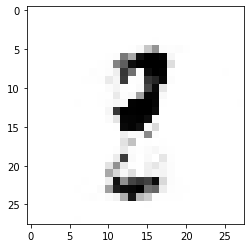

epoch  108 : D real = 0.0159582552 ,D fake = 0.0225351192 ,D total loss = 0.0384933744 ; G loss =  0.0121991541


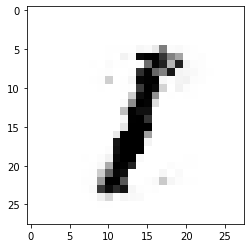

epoch  109 : D real = 0.0468589626 ,D fake = 0.0102586029 ,D total loss = 0.057117565499999995 ; G loss =  0.014709021


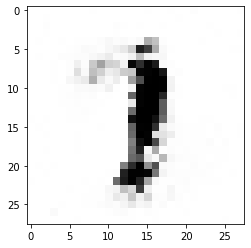

epoch  110 : D real = 0.0499290228 ,D fake = 0.0188105665 ,D total loss = 0.0687395893 ; G loss =  0.0636776164


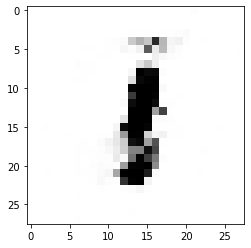

epoch  111 : D real = 0.0083640013 ,D fake = 0.042448502 ,D total loss = 0.0508125033 ; G loss =  0.021182524


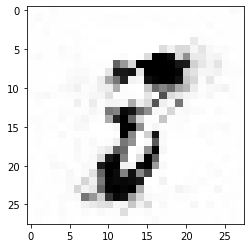

epoch  112 : D real = 0.0189671982 ,D fake = 0.0083472263 ,D total loss = 0.0273144245 ; G loss =  0.0535234436


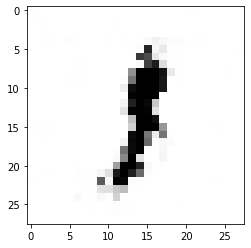

epoch  113 : D real = 0.0112438342 ,D fake = 0.0209765788 ,D total loss = 0.032220413 ; G loss =  0.002476376


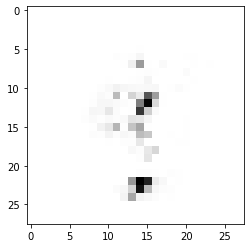

epoch  114 : D real = 0.0265628193 ,D fake = 0.0643975064 ,D total loss = 0.0909603257 ; G loss =  0.0730580166


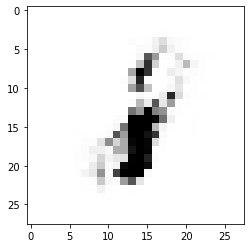

epoch  115 : D real = 0.0172127914 ,D fake = 0.0267254543 ,D total loss = 0.0439382457 ; G loss =  0.0993000343


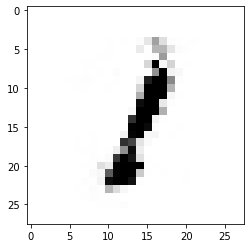

epoch  116 : D real = 0.0021168482 ,D fake = 0.0166905839 ,D total loss = 0.0188074321 ; G loss =  0.0086992253


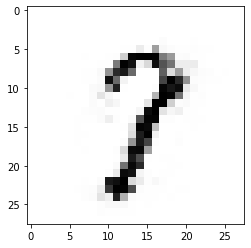

epoch  117 : D real = 0.0079459054 ,D fake = 0.0116848676 ,D total loss = 0.019630772999999997 ; G loss =  0.011149629


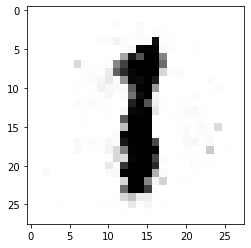

epoch  118 : D real = 0.0166500881 ,D fake = 0.0020874233 ,D total loss = 0.0187375114 ; G loss =  0.0573570728


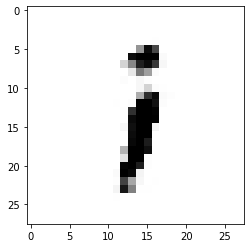

epoch  119 : D real = 0.0041200402 ,D fake = 0.004824914 ,D total loss = 0.0089449542 ; G loss =  0.0267559532


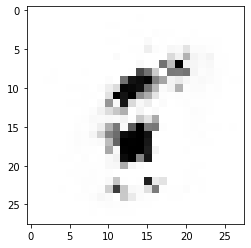

epoch  120 : D real = 0.0114203375 ,D fake = 0.0220874939 ,D total loss = 0.0335078314 ; G loss =  0.0382284634


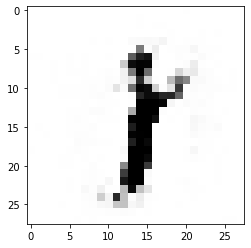

epoch  121 : D real = 0.0220677759 ,D fake = 0.0233909041 ,D total loss = 0.04545868 ; G loss =  0.0626092851


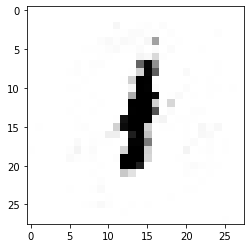

epoch  122 : D real = 0.0033124532 ,D fake = 0.0337363891 ,D total loss = 0.0370488423 ; G loss =  0.0231561363


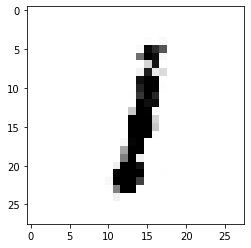

epoch  123 : D real = 0.0479884706 ,D fake = 0.0151154771 ,D total loss = 0.0631039477 ; G loss =  0.1665152311


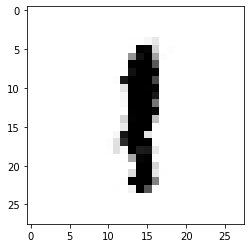

epoch  124 : D real = 0.0094656125 ,D fake = 0.005655949 ,D total loss = 0.0151215615 ; G loss =  0.0134218959


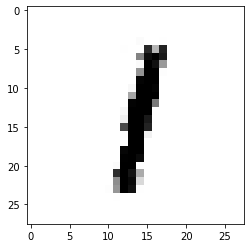

epoch  125 : D real = 0.005044532 ,D fake = 0.0070145046 ,D total loss = 0.0120590366 ; G loss =  0.0238056146


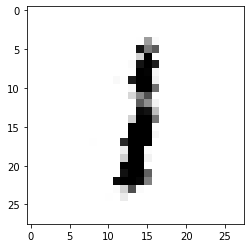

epoch  126 : D real = 0.0327375457 ,D fake = 0.0062483451 ,D total loss = 0.038985890800000006 ; G loss =  0.0202830695


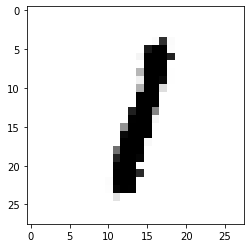

epoch  127 : D real = 0.0105910292 ,D fake = 0.0062413486 ,D total loss = 0.0168323778 ; G loss =  0.021357052


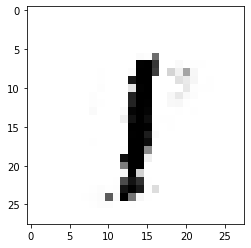

epoch  128 : D real = 0.0205502231 ,D fake = 0.0353182927 ,D total loss = 0.0558685158 ; G loss =  0.1529286802


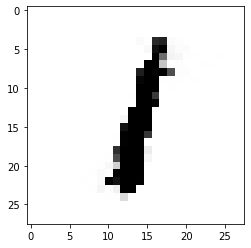

epoch  129 : D real = 0.1019964516 ,D fake = 0.0227597412 ,D total loss = 0.1247561928 ; G loss =  0.2131125629


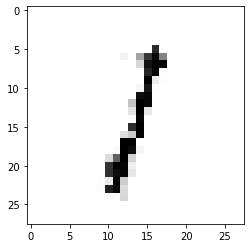

epoch  130 : D real = 0.0013652254 ,D fake = 0.0001973779 ,D total loss = 0.0015626033 ; G loss =  0.0056330552


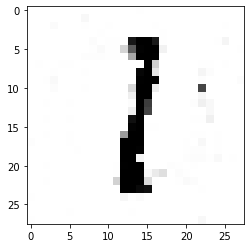

epoch  131 : D real = 0.0335023515 ,D fake = 0.0066183251 ,D total loss = 0.0401206766 ; G loss =  0.1281288713


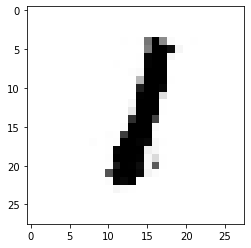

epoch  132 : D real = 0.0161664821 ,D fake = 0.0082344059 ,D total loss = 0.024400888000000003 ; G loss =  0.1141219735


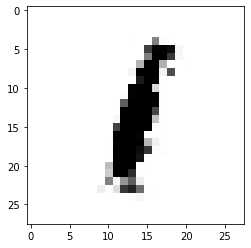

epoch  133 : D real = 0.0062772771 ,D fake = 0.0025306358 ,D total loss = 0.0088079129 ; G loss =  0.0871118754


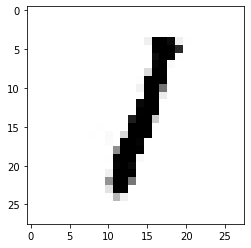

epoch  134 : D real = 0.0339109711 ,D fake = 0.0141574619 ,D total loss = 0.048068433 ; G loss =  0.149818033


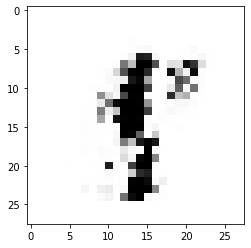

epoch  135 : D real = 0.0367480703 ,D fake = 0.021726463 ,D total loss = 0.0584745333 ; G loss =  0.2453812063


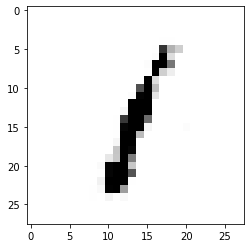

epoch  136 : D real = 0.0080134366 ,D fake = 0.0039078961 ,D total loss = 0.011921332699999999 ; G loss =  0.0124025978


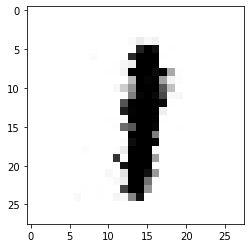

epoch  137 : D real = 0.0345547386 ,D fake = 0.020050073 ,D total loss = 0.054604811600000004 ; G loss =  0.1022327691


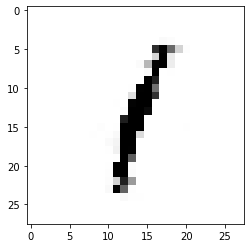

epoch  138 : D real = 0.0271104593 ,D fake = 0.0109788412 ,D total loss = 0.0380893005 ; G loss =  0.076651603


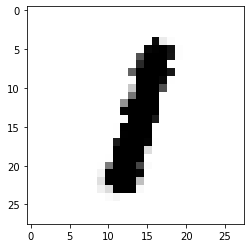

epoch  139 : D real = 0.0149090085 ,D fake = 0.0180612076 ,D total loss = 0.0329702161 ; G loss =  0.0150796156


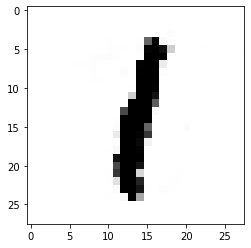

epoch  140 : D real = 0.01464462 ,D fake = 0.0029283245 ,D total loss = 0.0175729445 ; G loss =  0.0588877723


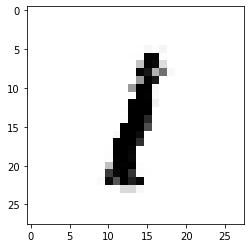

epoch  141 : D real = 0.0114674903 ,D fake = 0.0118117332 ,D total loss = 0.0232792235 ; G loss =  0.0537572801


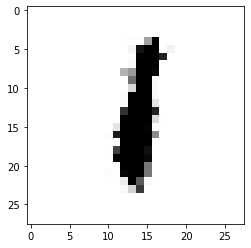

epoch  142 : D real = 0.008041475 ,D fake = 0.0261767413 ,D total loss = 0.0342182163 ; G loss =  0.077712588


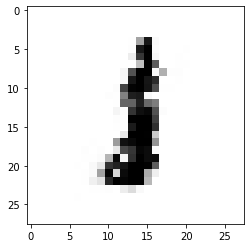

epoch  143 : D real = 0.0157330148 ,D fake = 0.0104644345 ,D total loss = 0.0261974493 ; G loss =  0.0192002039


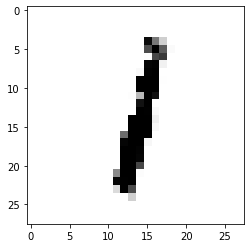

epoch  144 : D real = 0.0051222127 ,D fake = 0.0037515438 ,D total loss = 0.0088737565 ; G loss =  0.0540415831


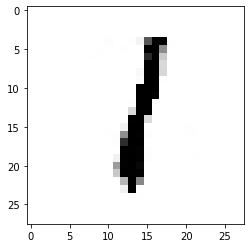

epoch  145 : D real = 0.0310056303 ,D fake = 0.0199878719 ,D total loss = 0.0509935022 ; G loss =  0.1004779115


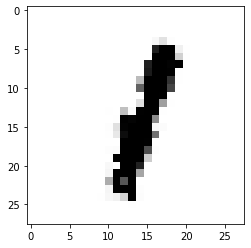

epoch  146 : D real = 0.0039887652 ,D fake = 0.0031653612 ,D total loss = 0.0071541264 ; G loss =  0.0236942749


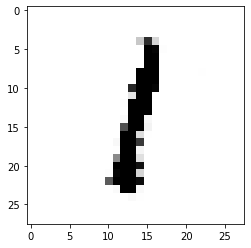

epoch  147 : D real = 0.0323372148 ,D fake = 0.0089215068 ,D total loss = 0.0412587216 ; G loss =  0.023114264


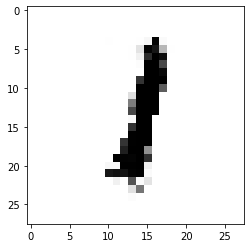

epoch  148 : D real = 0.0056205969 ,D fake = 0.014289056 ,D total loss = 0.019909652899999998 ; G loss =  0.0589046851


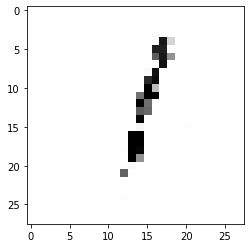

epoch  149 : D real = 0.0415470228 ,D fake = 0.0278621614 ,D total loss = 0.0694091842 ; G loss =  0.2763560414


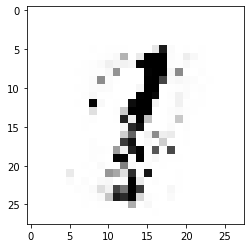

epoch  150 : D real = 0.0214967951 ,D fake = 0.0005038197 ,D total loss = 0.022000614800000002 ; G loss =  0.0165908895


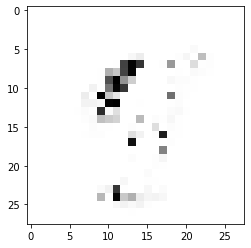

epoch  151 : D real = 0.0547064915 ,D fake = 0.0266774464 ,D total loss = 0.08138393790000001 ; G loss =  0.2943583429


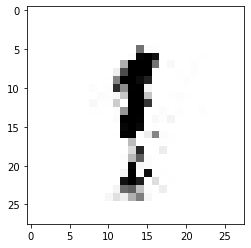

epoch  152 : D real = 0.0114464965 ,D fake = 0.0168007202 ,D total loss = 0.0282472167 ; G loss =  0.0807890072


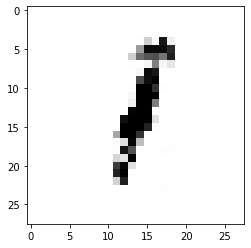

epoch  153 : D real = 0.0446688794 ,D fake = 0.0172489211 ,D total loss = 0.0619178005 ; G loss =  0.0893627033


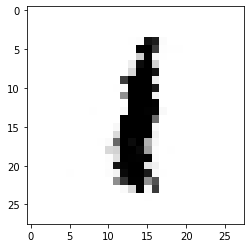

epoch  154 : D real = 0.0083901454 ,D fake = 0.0292833671 ,D total loss = 0.0376735125 ; G loss =  0.0445434935


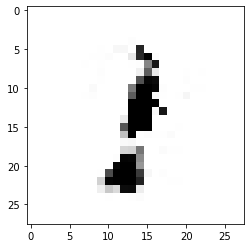

epoch  155 : D real = 0.0052850903 ,D fake = 0.0037812854 ,D total loss = 0.0090663757 ; G loss =  0.0229426138


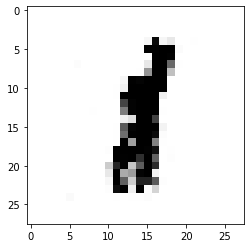

epoch  156 : D real = 0.0203940626 ,D fake = 0.0040007774 ,D total loss = 0.024394839999999997 ; G loss =  0.0222132802


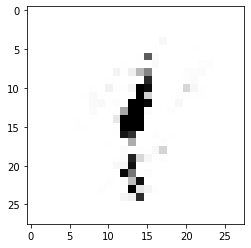

epoch  157 : D real = 0.0302553326 ,D fake = 0.0113812443 ,D total loss = 0.0416365769 ; G loss =  0.3117149472


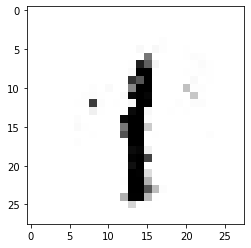

epoch  158 : D real = 0.0300816856 ,D fake = 0.0140519263 ,D total loss = 0.0441336119 ; G loss =  0.1041196361


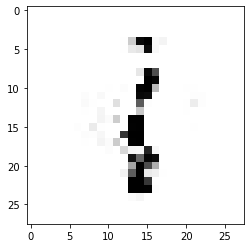

epoch  159 : D real = 0.0109085618 ,D fake = 0.0343235359 ,D total loss = 0.0452320977 ; G loss =  0.0244156476


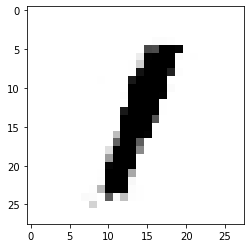

epoch  160 : D real = 0.0579947457 ,D fake = 0.0608751699 ,D total loss = 0.1188699156 ; G loss =  0.0661342666


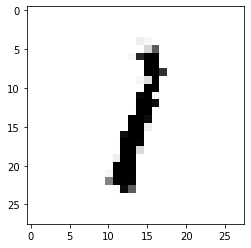

epoch  161 : D real = 0.0153288571 ,D fake = 0.0429353379 ,D total loss = 0.058264195000000005 ; G loss =  0.112451911


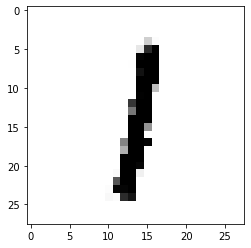

epoch  162 : D real = 0.0304118861 ,D fake = 0.004887315 ,D total loss = 0.0352992011 ; G loss =  0.0773801655


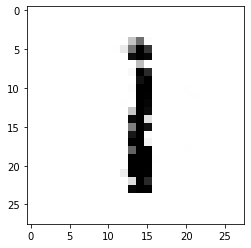

epoch  163 : D real = 0.0264260881 ,D fake = 0.0265027452 ,D total loss = 0.052928833300000006 ; G loss =  0.1626863182


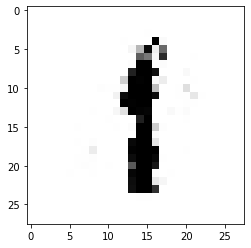

epoch  164 : D real = 0.0123624606 ,D fake = 0.0116363745 ,D total loss = 0.023998835099999997 ; G loss =  0.0936131775


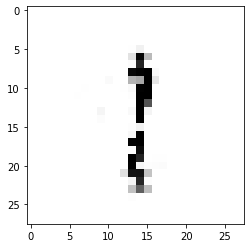

epoch  165 : D real = 0.0232345238 ,D fake = 0.0111354925 ,D total loss = 0.0343700163 ; G loss =  0.0968499035


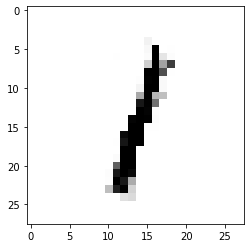

epoch  166 : D real = 0.0067191184 ,D fake = 0.0083657876 ,D total loss = 0.015084906 ; G loss =  0.0288760625


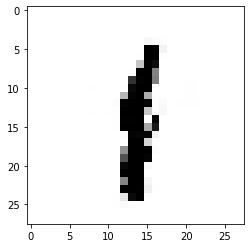

epoch  167 : D real = 0.0365171246 ,D fake = 0.0216135755 ,D total loss = 0.0581307001 ; G loss =  0.2064042091


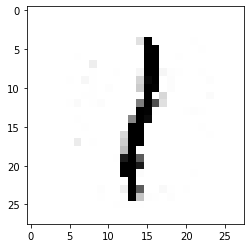

epoch  168 : D real = 0.0178258233 ,D fake = 0.0064067924 ,D total loss = 0.0242326157 ; G loss =  0.2002379894


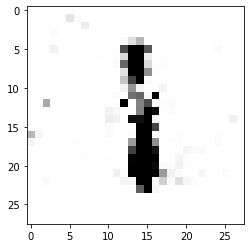

epoch  169 : D real = 0.0193554424 ,D fake = 0.0104016615 ,D total loss = 0.029757103899999998 ; G loss =  0.1959568709


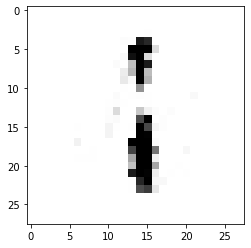

epoch  170 : D real = 0.0090862466 ,D fake = 0.016402185 ,D total loss = 0.0254884316 ; G loss =  0.0124429557


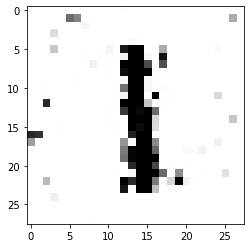

epoch  171 : D real = 0.0320188478 ,D fake = 0.008681573 ,D total loss = 0.0407004208 ; G loss =  0.0568216629


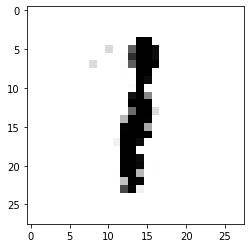

epoch  172 : D real = 0.0452608056 ,D fake = 0.0171456616 ,D total loss = 0.0624064672 ; G loss =  0.1115983501


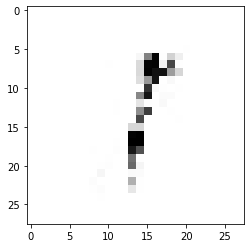

epoch  173 : D real = 0.0645615309 ,D fake = 0.0365104415 ,D total loss = 0.10107197239999999 ; G loss =  0.1346254796


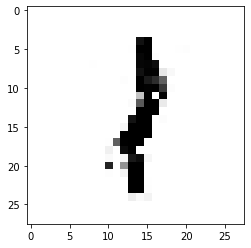

epoch  174 : D real = 0.0028305035 ,D fake = 0.0338217951 ,D total loss = 0.0366522986 ; G loss =  0.0192801077


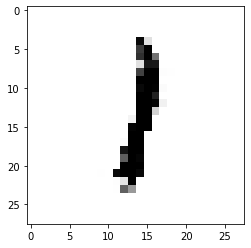

epoch  175 : D real = 0.0257357247 ,D fake = 0.0064021717 ,D total loss = 0.0321378964 ; G loss =  0.0608768463


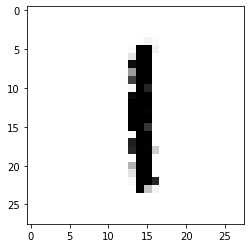

epoch  176 : D real = 0.0126781352 ,D fake = 0.016663976 ,D total loss = 0.0293421112 ; G loss =  0.0500249267


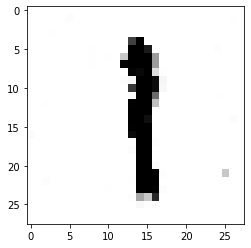

epoch  177 : D real = 0.0275312029 ,D fake = 0.0292665102 ,D total loss = 0.0567977131 ; G loss =  0.0830149502


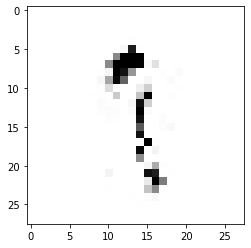

epoch  178 : D real = 0.0249833073 ,D fake = 0.0228366461 ,D total loss = 0.047819953400000004 ; G loss =  0.1072533727


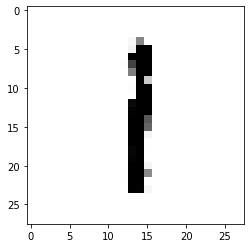

epoch  179 : D real = 0.0617222078 ,D fake = 0.0363796055 ,D total loss = 0.09810181330000001 ; G loss =  0.3037170172


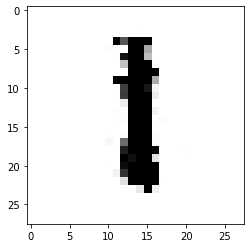

epoch  180 : D real = 0.0220142566 ,D fake = 0.0215116702 ,D total loss = 0.0435259268 ; G loss =  0.0603222959


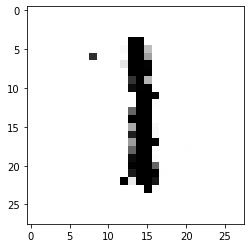

epoch  181 : D real = 0.0232763197 ,D fake = 0.0136210304 ,D total loss = 0.0368973501 ; G loss =  0.222899586


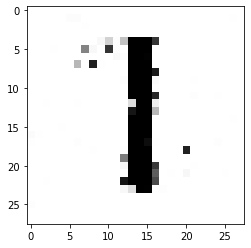

epoch  182 : D real = 0.0085048722 ,D fake = 0.0114493333 ,D total loss = 0.0199542055 ; G loss =  0.1342507899


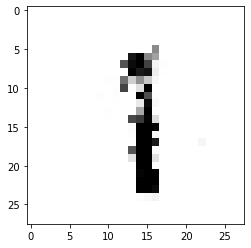

epoch  183 : D real = 0.0147725344 ,D fake = 0.0264438 ,D total loss = 0.0412163344 ; G loss =  0.1195997


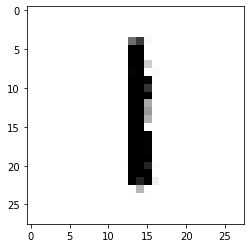

epoch  184 : D real = 0.0147593096 ,D fake = 0.012927453 ,D total loss = 0.027686762599999998 ; G loss =  0.0696688518


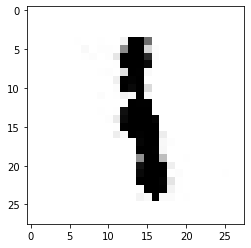

epoch  185 : D real = 0.0471773371 ,D fake = 0.0224408451 ,D total loss = 0.0696181822 ; G loss =  0.3890782595


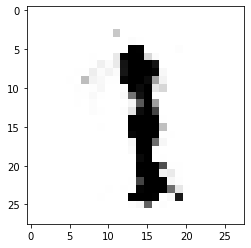

epoch  186 : D real = 0.0171936601 ,D fake = 0.024414083 ,D total loss = 0.0416077431 ; G loss =  0.0076126889


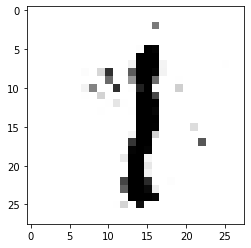

epoch  187 : D real = 0.0167516135 ,D fake = 0.0138473315 ,D total loss = 0.030598945 ; G loss =  0.1034168974


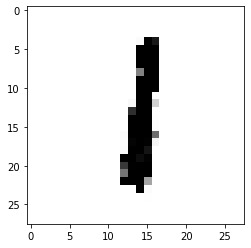

epoch  188 : D real = 0.0353534259 ,D fake = 0.0242575947 ,D total loss = 0.059611020599999995 ; G loss =  0.2774538398


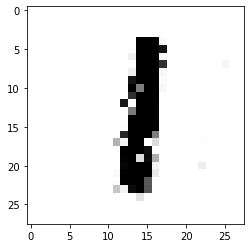

epoch  189 : D real = 0.0642589629 ,D fake = 0.0546468161 ,D total loss = 0.11890577899999999 ; G loss =  0.5349881649


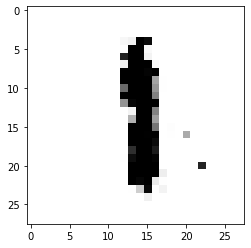

epoch  190 : D real = 0.0335933194 ,D fake = 0.0239698403 ,D total loss = 0.057563159700000005 ; G loss =  0.1254145205


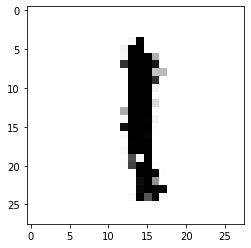

epoch  191 : D real = 0.0312474314 ,D fake = 0.0189490914 ,D total loss = 0.050196522800000004 ; G loss =  0.4840547144


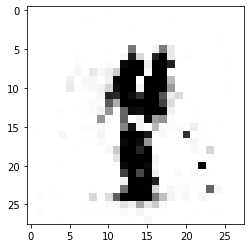

epoch  192 : D real = 0.0039106766 ,D fake = 0.0178540796 ,D total loss = 0.0217647562 ; G loss =  0.0212674383


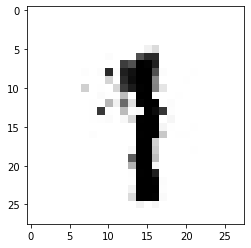

epoch  193 : D real = 0.0074895853 ,D fake = 0.0139559694 ,D total loss = 0.0214455547 ; G loss =  0.0754930004


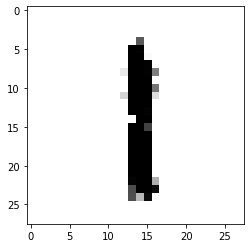

epoch  194 : D real = 0.0256309528 ,D fake = 0.019014826 ,D total loss = 0.044645778799999994 ; G loss =  0.0970564783


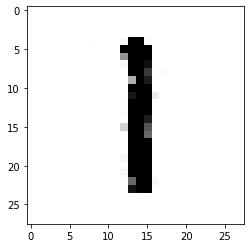

epoch  195 : D real = 0.0311813802 ,D fake = 0.0192774236 ,D total loss = 0.0504588038 ; G loss =  0.1433374286


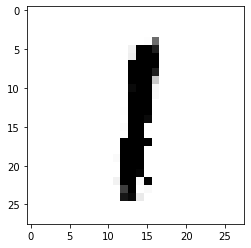

epoch  196 : D real = 0.0038687715 ,D fake = 0.0173169654 ,D total loss = 0.0211857369 ; G loss =  0.0053292746


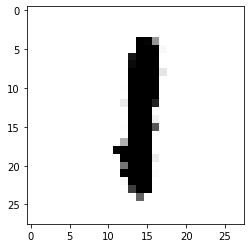

epoch  197 : D real = 0.0259017497 ,D fake = 0.0166971907 ,D total loss = 0.0425989404 ; G loss =  0.1936016977


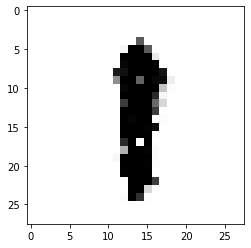

epoch  198 : D real = 0.0635806397 ,D fake = 0.0282231849 ,D total loss = 0.0918038246 ; G loss =  0.4056414664


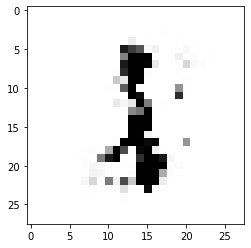

epoch  199 : D real = 0.0316722505 ,D fake = 0.0224381741 ,D total loss = 0.0541104246 ; G loss =  0.1551214457


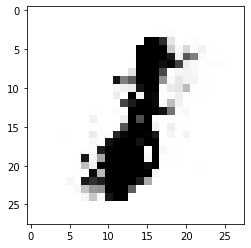

epoch  200 : D real = 0.052076567 ,D fake = 0.0327297598 ,D total loss = 0.0848063268 ; G loss =  0.0694312602


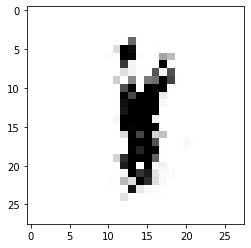

epoch  201 : D real = 0.0305323023 ,D fake = 0.0048218984 ,D total loss = 0.035354200700000005 ; G loss =  0.2119208872


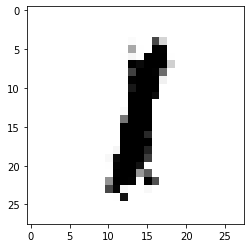

epoch  202 : D real = 0.0215503257 ,D fake = 0.0106264912 ,D total loss = 0.0321768169 ; G loss =  0.0442310683


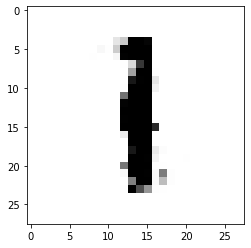

epoch  203 : D real = 0.0842747167 ,D fake = 0.0220047235 ,D total loss = 0.1062794402 ; G loss =  0.3565384746


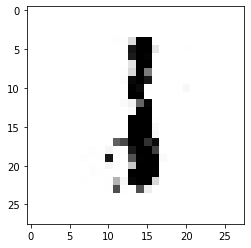

epoch  204 : D real = 0.0416799597 ,D fake = 0.0311625432 ,D total loss = 0.0728425029 ; G loss =  0.3179571927


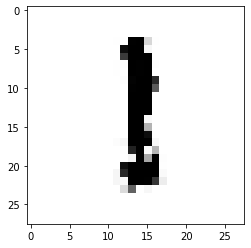

epoch  205 : D real = 0.0297095533 ,D fake = 0.032236591 ,D total loss = 0.061946144300000006 ; G loss =  0.6020624042


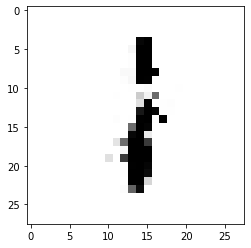

epoch  206 : D real = 0.0265908968 ,D fake = 0.0297018923 ,D total loss = 0.056292789100000004 ; G loss =  0.4747245908


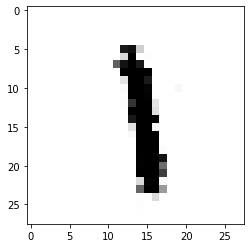

epoch  207 : D real = 0.0843016505 ,D fake = 0.0447504185 ,D total loss = 0.129052069 ; G loss =  0.5396617651


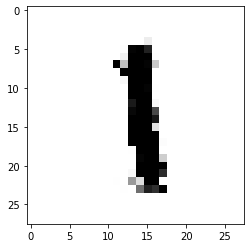

epoch  208 : D real = 0.0235481635 ,D fake = 0.0123511525 ,D total loss = 0.035899316 ; G loss =  0.317140609


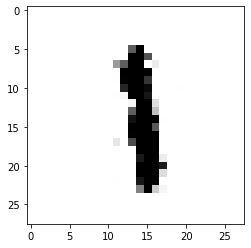

epoch  209 : D real = 0.1095437258 ,D fake = 0.0150009971 ,D total loss = 0.1245447229 ; G loss =  0.1649339497


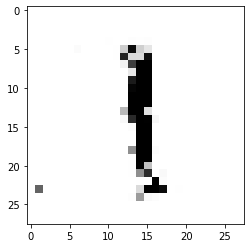

epoch  210 : D real = 0.0613701195 ,D fake = 0.0065083271 ,D total loss = 0.0678784466 ; G loss =  0.2405967414


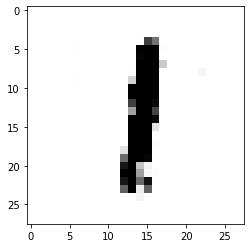

epoch  211 : D real = 0.0540911108 ,D fake = 0.0308443252 ,D total loss = 0.084935436 ; G loss =  0.3400946259


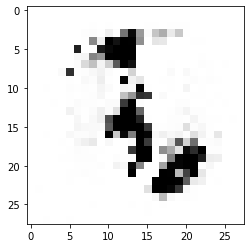

epoch  212 : D real = 0.0540092885 ,D fake = 0.025855599 ,D total loss = 0.07986488750000001 ; G loss =  0.5181296468


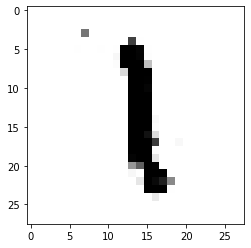

epoch  213 : D real = 0.032715831 ,D fake = 0.0113400472 ,D total loss = 0.0440558782 ; G loss =  0.2503426969


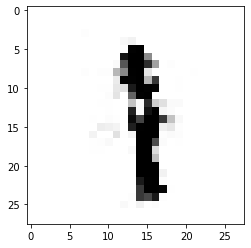

epoch  214 : D real = 0.0155758606 ,D fake = 0.0025242327 ,D total loss = 0.0181000933 ; G loss =  0.0796061158


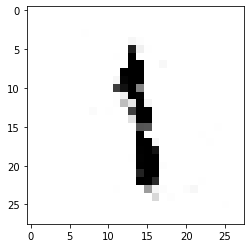

epoch  215 : D real = 0.0599925593 ,D fake = 0.034436442 ,D total loss = 0.0944290013 ; G loss =  0.4552213252


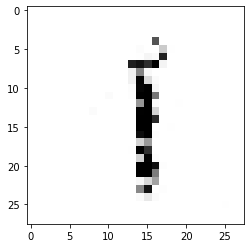

epoch  216 : D real = 0.0547060072 ,D fake = 0.0180207938 ,D total loss = 0.072726801 ; G loss =  0.4622984827


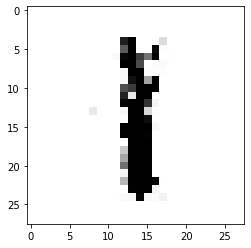

epoch  217 : D real = 0.0515082926 ,D fake = 0.0258527286 ,D total loss = 0.07736102119999999 ; G loss =  0.5909333825


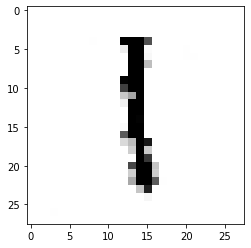

epoch  218 : D real = 0.0388407819 ,D fake = 0.0435675308 ,D total loss = 0.0824083127 ; G loss =  0.5784472227


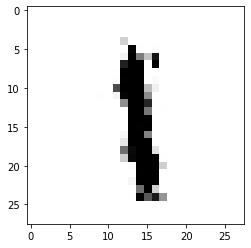

epoch  219 : D real = 0.0655248836 ,D fake = 0.0340297893 ,D total loss = 0.0995546729 ; G loss =  0.5897839069


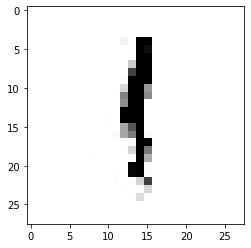

epoch  220 : D real = 0.0302002523 ,D fake = 0.0134163769 ,D total loss = 0.0436166292 ; G loss =  0.066105023


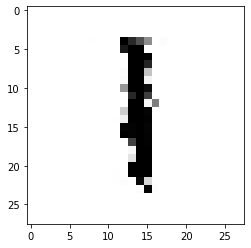

epoch  221 : D real = 0.0267869327 ,D fake = 0.0095539931 ,D total loss = 0.0363409258 ; G loss =  0.0740052909


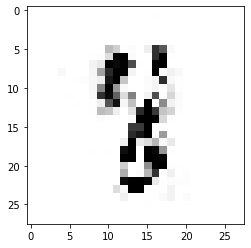

epoch  222 : D real = 0.0088704005 ,D fake = 0.0239444021 ,D total loss = 0.0328148026 ; G loss =  0.0509635285


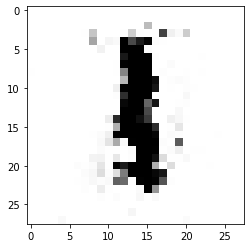

epoch  223 : D real = 0.0024697406 ,D fake = 0.0067489902 ,D total loss = 0.0092187308 ; G loss =  0.0558404401


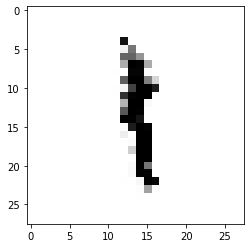

epoch  224 : D real = 0.002963308 ,D fake = 0.0080243275 ,D total loss = 0.010987635499999999 ; G loss =  0.019519113


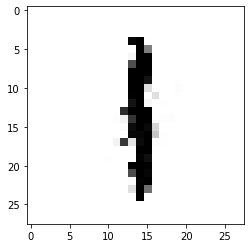

epoch  225 : D real = 0.01372978 ,D fake = 0.0239800327 ,D total loss = 0.0377098127 ; G loss =  0.2448676527


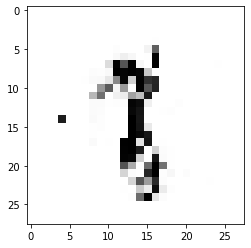

epoch  226 : D real = 0.0194973778 ,D fake = 0.0298158713 ,D total loss = 0.0493132491 ; G loss =  0.0866783261


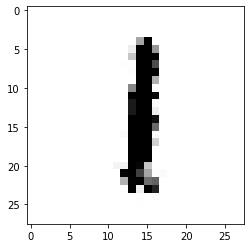

epoch  227 : D real = 0.0242307875 ,D fake = 0.0123750847 ,D total loss = 0.0366058722 ; G loss =  0.1669548303


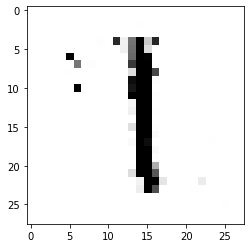

epoch  228 : D real = 0.0154403625 ,D fake = 0.0216097161 ,D total loss = 0.0370500786 ; G loss =  0.1397900879


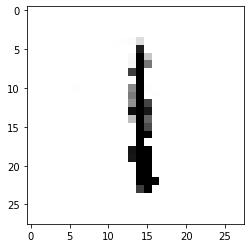

epoch  229 : D real = 0.0354298726 ,D fake = 0.014162627 ,D total loss = 0.049592499600000006 ; G loss =  0.2896620631


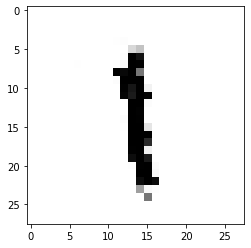

epoch  230 : D real = 0.0082316818 ,D fake = 0.0156112351 ,D total loss = 0.0238429169 ; G loss =  0.0420613773


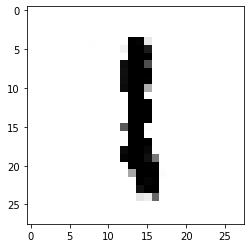

epoch  231 : D real = 0.0110569075 ,D fake = 0.0139346616 ,D total loss = 0.0249915691 ; G loss =  0.037675105


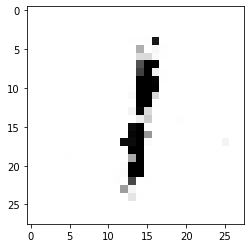

epoch  232 : D real = 0.0088504031 ,D fake = 0.0109817479 ,D total loss = 0.019832151 ; G loss =  0.0714472607


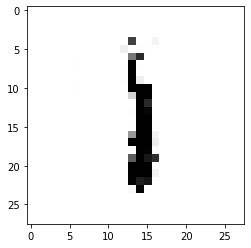

epoch  233 : D real = 0.0394256227 ,D fake = 0.0145914312 ,D total loss = 0.0540170539 ; G loss =  0.7670856714


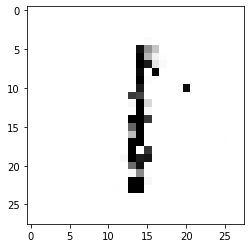

epoch  234 : D real = 0.0373831131 ,D fake = 0.0050724763 ,D total loss = 0.04245558939999999 ; G loss =  0.1141498461


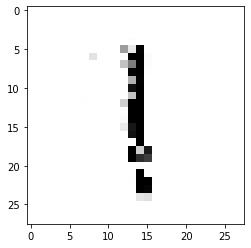

epoch  235 : D real = 0.0252209753 ,D fake = 0.0234205835 ,D total loss = 0.0486415588 ; G loss =  0.07598079


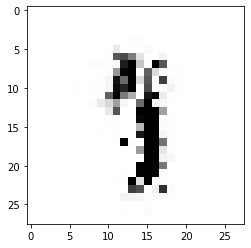

epoch  236 : D real = 0.0129840579 ,D fake = 0.0055085747 ,D total loss = 0.0184926326 ; G loss =  0.1298719645


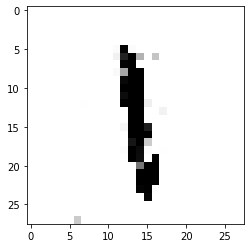

epoch  237 : D real = 0.029900305 ,D fake = 0.0307119191 ,D total loss = 0.0606122241 ; G loss =  0.585179925


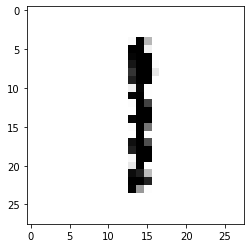

epoch  238 : D real = 0.0340887941 ,D fake = 0.0061663771 ,D total loss = 0.0402551712 ; G loss =  0.0649641752


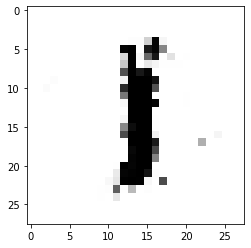

epoch  239 : D real = 0.0094708418 ,D fake = 0.0237474572 ,D total loss = 0.033218299 ; G loss =  0.0504387096


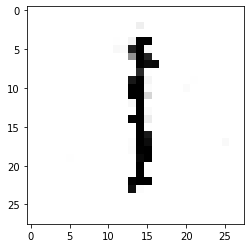

epoch  240 : D real = 0.0172919109 ,D fake = 0.0146213388 ,D total loss = 0.0319132497 ; G loss =  0.2030322552


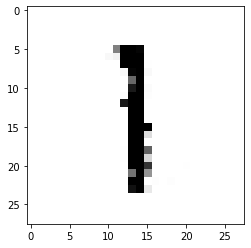

epoch  241 : D real = 0.0284437127 ,D fake = 0.0305171888 ,D total loss = 0.058960901499999996 ; G loss =  0.5006092787


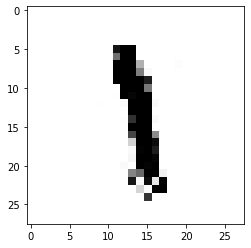

epoch  242 : D real = 0.0390603058 ,D fake = 0.0224080794 ,D total loss = 0.0614683852 ; G loss =  0.161227107


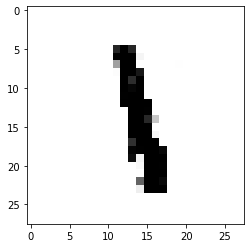

epoch  243 : D real = 0.0204593055 ,D fake = 0.0189875513 ,D total loss = 0.0394468568 ; G loss =  0.1900511235


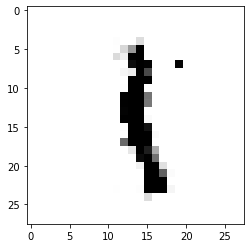

epoch  244 : D real = 0.0386634134 ,D fake = 0.0040083453 ,D total loss = 0.0426717587 ; G loss =  0.0415344089


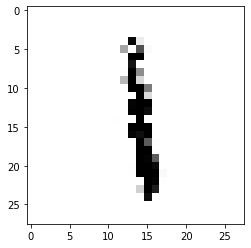

epoch  245 : D real = 0.0148899481 ,D fake = 0.0135802124 ,D total loss = 0.0284701605 ; G loss =  0.0435472876


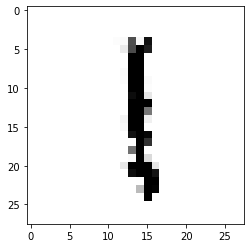

epoch  246 : D real = 0.0256004613 ,D fake = 0.0163874384 ,D total loss = 0.0419878997 ; G loss =  0.1999489814


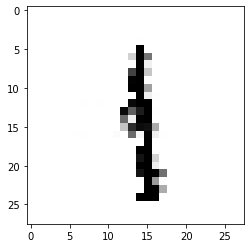

epoch  247 : D real = 0.0376309417 ,D fake = 0.0302810706 ,D total loss = 0.06791201229999999 ; G loss =  0.4202691913


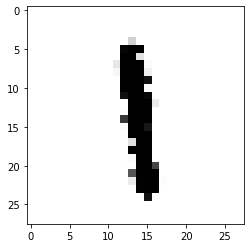

epoch  248 : D real = 0.0383907743 ,D fake = 0.0169673376 ,D total loss = 0.0553581119 ; G loss =  0.5624334812


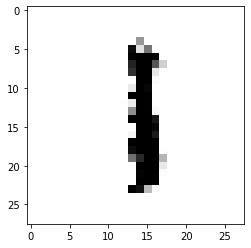

epoch  249 : D real = 0.0274492651 ,D fake = 0.0281362161 ,D total loss = 0.055585481199999995 ; G loss =  0.4985335469


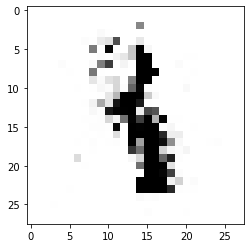

epoch  250 : D real = 0.0310111493 ,D fake = 0.0270970389 ,D total loss = 0.058108188199999994 ; G loss =  0.2490314245


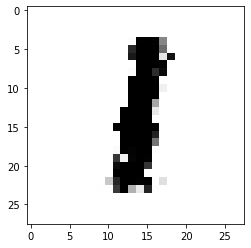

epoch  251 : D real = 0.0322719663 ,D fake = 0.0100377211 ,D total loss = 0.042309687400000004 ; G loss =  0.0846023858


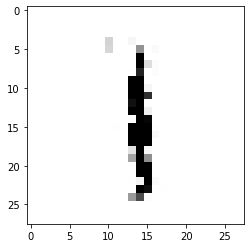

epoch  252 : D real = 0.0211012904 ,D fake = 0.0093366737 ,D total loss = 0.0304379641 ; G loss =  0.1592991054


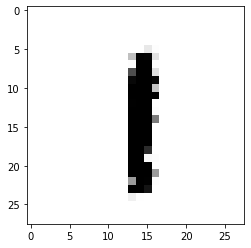

epoch  253 : D real = 0.0332438648 ,D fake = 0.0193852745 ,D total loss = 0.0526291393 ; G loss =  0.2599180341


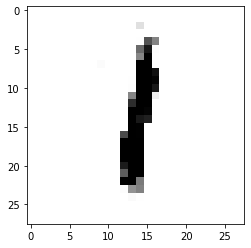

epoch  254 : D real = 0.0339769535 ,D fake = 0.0216636136 ,D total loss = 0.055640567099999996 ; G loss =  0.3082844019


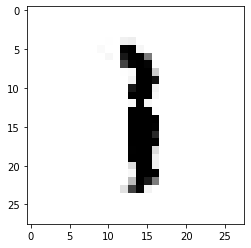

epoch  255 : D real = 0.0647701323 ,D fake = 0.0255262237 ,D total loss = 0.09029635600000001 ; G loss =  0.6639446616


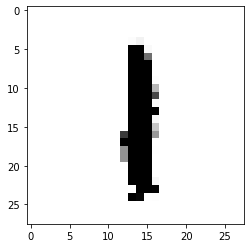

epoch  256 : D real = 0.0073852786 ,D fake = 0.0361951329 ,D total loss = 0.0435804115 ; G loss =  0.0436759032


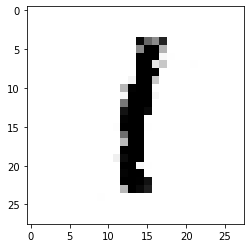

epoch  257 : D real = 0.0522016473 ,D fake = 0.0141024776 ,D total loss = 0.0663041249 ; G loss =  0.3266447484


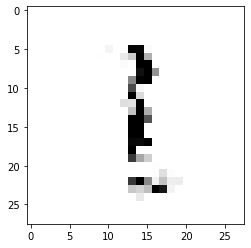

epoch  258 : D real = 0.0134480074 ,D fake = 0.0102758352 ,D total loss = 0.0237238426 ; G loss =  0.1839459836


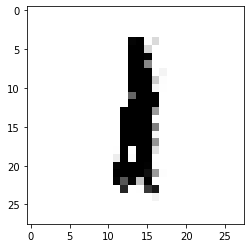

epoch  259 : D real = 0.0612650886 ,D fake = 0.029839104 ,D total loss = 0.09110419260000001 ; G loss =  0.666069448


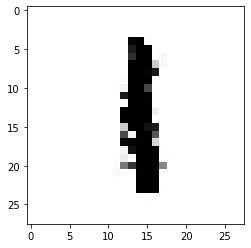

epoch  260 : D real = 0.0215213113 ,D fake = 0.0167118087 ,D total loss = 0.038233119999999995 ; G loss =  0.0468862727


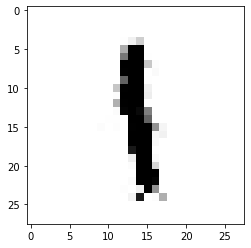

epoch  261 : D real = 0.0282601714 ,D fake = 0.0154591007 ,D total loss = 0.0437192721 ; G loss =  0.1036557779


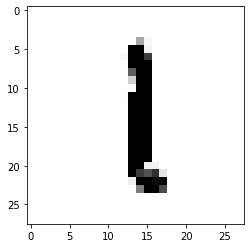

epoch  262 : D real = 0.023264382 ,D fake = 0.0226276852 ,D total loss = 0.0458920672 ; G loss =  0.0629142076


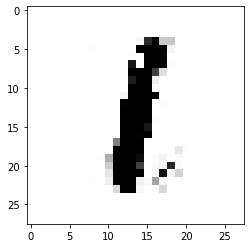

epoch  263 : D real = 0.0911268368 ,D fake = 0.0561695322 ,D total loss = 0.14729636899999998 ; G loss =  0.3387631178


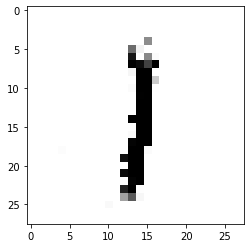

epoch  264 : D real = 0.0085639441 ,D fake = 0.0190473553 ,D total loss = 0.027611299399999997 ; G loss =  0.117229104


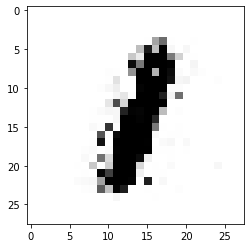

epoch  265 : D real = 0.0326592959 ,D fake = 0.0185976736 ,D total loss = 0.0512569695 ; G loss =  0.1878152192


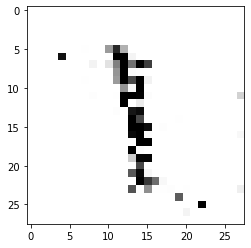

epoch  266 : D real = 0.0089233508 ,D fake = 0.0091126114 ,D total loss = 0.0180359622 ; G loss =  0.0185368657


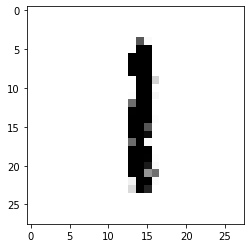

epoch  267 : D real = 0.0603891313 ,D fake = 0.0296494309 ,D total loss = 0.0900385622 ; G loss =  0.1295748949


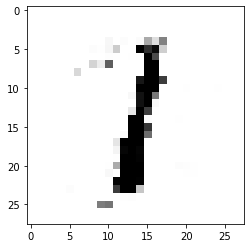

epoch  268 : D real = 0.0085033532 ,D fake = 0.019970879 ,D total loss = 0.028474232199999998 ; G loss =  0.0982597321


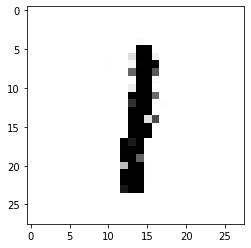

epoch  269 : D real = 0.03667273 ,D fake = 0.0422991887 ,D total loss = 0.0789719187 ; G loss =  0.3328228593


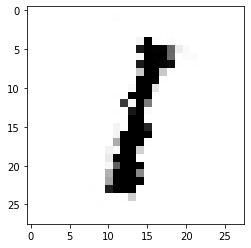

epoch  270 : D real = 0.0252119675 ,D fake = 0.0160282627 ,D total loss = 0.041240230200000005 ; G loss =  0.0984798148


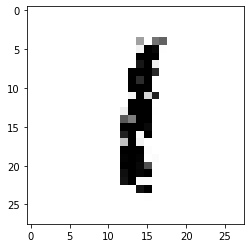

epoch  271 : D real = 0.0267912876 ,D fake = 0.0244291238 ,D total loss = 0.0512204114 ; G loss =  0.3089746833


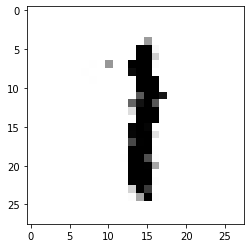

epoch  272 : D real = 0.020323474 ,D fake = 0.0133472998 ,D total loss = 0.0336707738 ; G loss =  0.0525589213


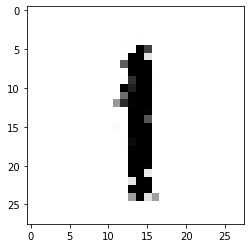

epoch  273 : D real = 0.0697318986 ,D fake = 0.021015428 ,D total loss = 0.0907473266 ; G loss =  0.2235571444


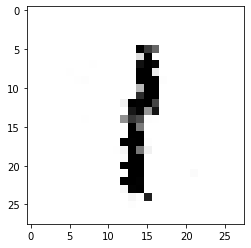

epoch  274 : D real = 0.0653874129 ,D fake = 0.019033663 ,D total loss = 0.0844210759 ; G loss =  0.372243613


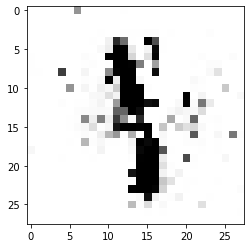

epoch  275 : D real = 0.0799437165 ,D fake = 0.0432797782 ,D total loss = 0.12322349469999999 ; G loss =  0.1390825659


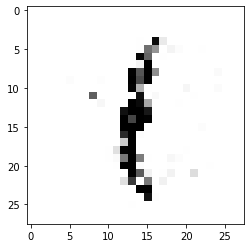

epoch  276 : D real = 0.0107717644 ,D fake = 0.0147980554 ,D total loss = 0.025569819799999997 ; G loss =  0.071991846


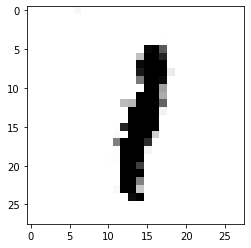

epoch  277 : D real = 0.066891402 ,D fake = 0.0117682125 ,D total loss = 0.0786596145 ; G loss =  0.3036493957


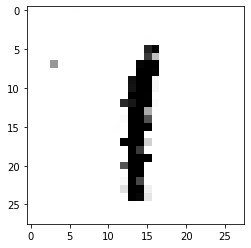

epoch  278 : D real = 0.0072113774 ,D fake = 0.0050886432 ,D total loss = 0.0123000206 ; G loss =  0.0362171903


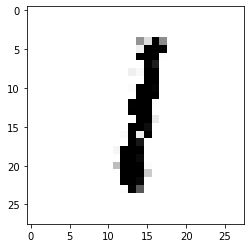

epoch  279 : D real = 0.0251356959 ,D fake = 0.025210591 ,D total loss = 0.0503462869 ; G loss =  0.2816614211


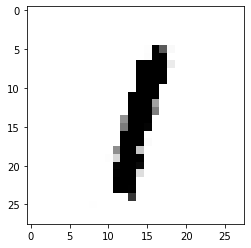

epoch  280 : D real = 0.0292945746 ,D fake = 0.0228138156 ,D total loss = 0.0521083902 ; G loss =  0.2630031109


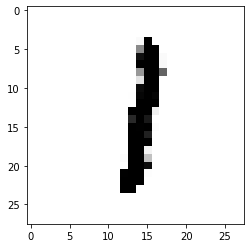

epoch  281 : D real = 0.0377882645 ,D fake = 0.0229235161 ,D total loss = 0.0607117806 ; G loss =  0.4805170894


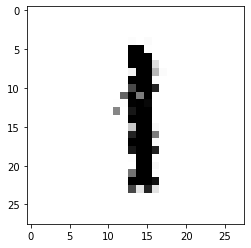

epoch  282 : D real = 0.0235518441 ,D fake = 0.0127090411 ,D total loss = 0.0362608852 ; G loss =  0.1001075953


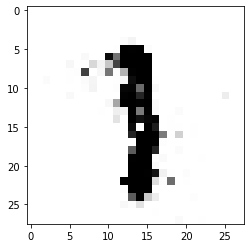

epoch  283 : D real = 0.0427499041 ,D fake = 0.0160151236 ,D total loss = 0.0587650277 ; G loss =  0.2585323155


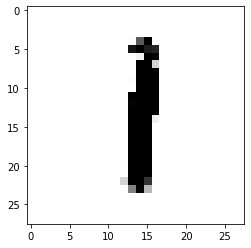

epoch  284 : D real = 0.0139843244 ,D fake = 0.0165554136 ,D total loss = 0.030539737999999997 ; G loss =  0.0136448415


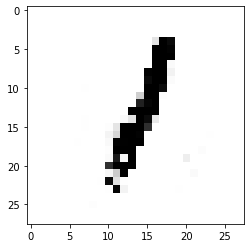

epoch  285 : D real = 0.0641578361 ,D fake = 0.0181285031 ,D total loss = 0.0822863392 ; G loss =  0.0934226885


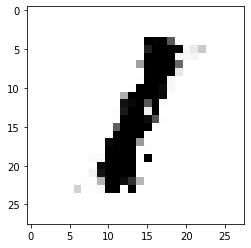

epoch  286 : D real = 0.0768276677 ,D fake = 0.0417255461 ,D total loss = 0.1185532138 ; G loss =  0.2951601744


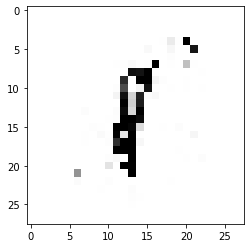

epoch  287 : D real = 0.0185178407 ,D fake = 0.0118002677 ,D total loss = 0.0303181084 ; G loss =  0.1628736556


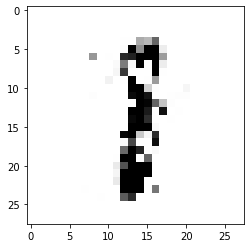

epoch  288 : D real = 0.0452318043 ,D fake = 0.0284435004 ,D total loss = 0.0736753047 ; G loss =  0.2350395024


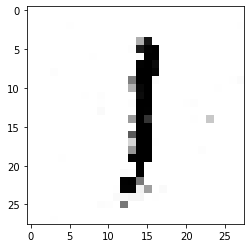

epoch  289 : D real = 0.0464025624 ,D fake = 0.0246362779 ,D total loss = 0.0710388403 ; G loss =  0.083729431


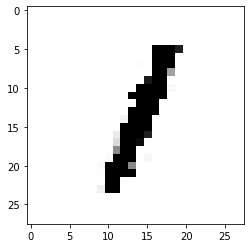

epoch  290 : D real = 0.0019888103 ,D fake = 0.0279325321 ,D total loss = 0.029921342400000002 ; G loss =  0.0094906865


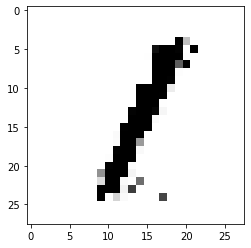

epoch  291 : D real = 0.0219913479 ,D fake = 0.0202613827 ,D total loss = 0.042252730599999996 ; G loss =  0.0501348786


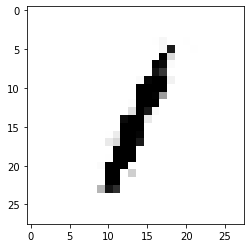

epoch  292 : D real = 0.0266585443 ,D fake = 0.0199024044 ,D total loss = 0.0465609487 ; G loss =  0.0811678395


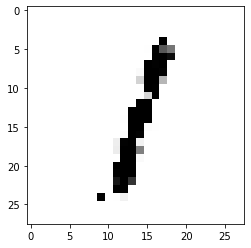

epoch  293 : D real = 0.0195955671 ,D fake = 0.0303312913 ,D total loss = 0.049926858399999996 ; G loss =  0.077236779


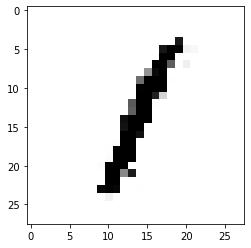

epoch  294 : D real = 0.018060267 ,D fake = 0.0163392667 ,D total loss = 0.0343995337 ; G loss =  0.0125494376


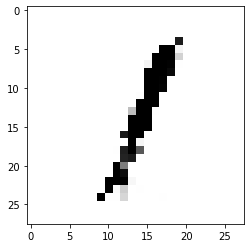

epoch  295 : D real = 0.0401846096 ,D fake = 0.0342694521 ,D total loss = 0.07445406169999999 ; G loss =  0.1396012902


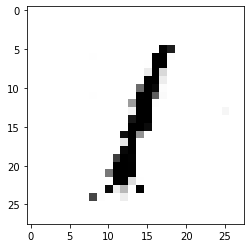

epoch  296 : D real = 0.0575933605 ,D fake = 0.0283044018 ,D total loss = 0.0858977623 ; G loss =  0.2848513126


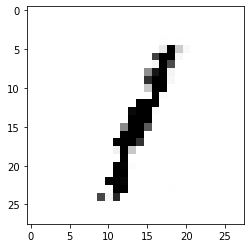

epoch  297 : D real = 0.0292718709 ,D fake = 0.0331270359 ,D total loss = 0.0623989068 ; G loss =  0.0312681422


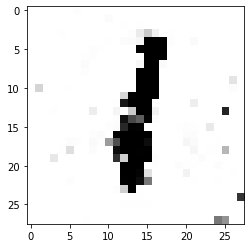

epoch  298 : D real = 0.0284773279 ,D fake = 0.016493883 ,D total loss = 0.0449712109 ; G loss =  0.1466098577


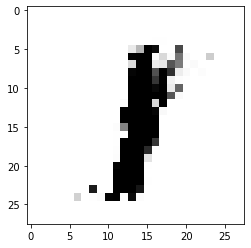

epoch  299 : D real = 0.0333899446 ,D fake = 0.0235409662 ,D total loss = 0.0569309108 ; G loss =  0.060439717


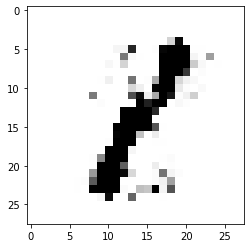

In [162]:
# Model parameters
g_input_dim = 100      # Size of random noise dimension coming into generator
g_hidden_dim = 256     # Size of hidden layer for generator
g_output_dim = 28*28   # Size of generated output vector
d_input_dim = 28*28    # Size of input image
d_hidden_dim = 256     # Size of hidden layer for discriminator
d_output_dim = 1       # Single dimension for binary classification

n_epochs = 300
batch_dim = 256

d_learning_rate = 0.0003
g_learning_rate = 0.0003

train_data = train_data_pixels*2-1   # Train GAN on all images
#train_data = specific_train*2-1     # Train GAN on images with number '4'

d_real_loss = 0
d_fake_loss = 0
g_loss = 0

G = Generator(g_input_dim, g_hidden_dim, g_output_dim)
D = Discriminator(d_input_dim, d_hidden_dim, d_output_dim)
criterion = nn.BCELoss()  # Binary cross entropy

d_optimizer = torch.optim.Adam(D.parameters(), lr=d_learning_rate)
g_optimizer = torch.optim.Adam(G.parameters(), lr=g_learning_rate)

for epoch in range(n_epochs):
    
    G.train()
    D.train()
    
    for i in range(0, train_data.shape[0], batch_dim):
        
        d_optimizer.zero_grad()
        digits_index = np.random.choice(train_data.numpy().shape[0],batch_dim)
        batch = train_data[digits_index]

        #Train D on real
        d_real_decision = D(batch)
        d_real_error = criterion(d_real_decision, torch.ones([batch.size()[0],1]))  # ones -> true
        d_real_loss = round(d_real_error.item(),10)

        # Train D on fake
        d_gen_input = G.sampler(batch.size()[0])
        d_fake_data = G(d_gen_input).detach()  # detach G to avoid training G on these labels
        d_fake_decision = D(d_fake_data)
        d_fake_error = criterion(d_fake_decision, torch.zeros([batch.size()[0],1]))  # zeros -> fake
        d_fake_loss = round(d_fake_error.item(),10)
        
        total_error = d_real_error + d_fake_error
        
        total_error.backward()
        d_optimizer.step()     # Only optimizes D's parameters; changes based on stored gradients from backward()

        
    for i in range(0, train_data.shape[0], batch_dim):
        # Train G on D's response 
        g_optimizer.zero_grad()
        
        batch = train_data[i:i+batch_dim]
        
        g_gen_input = G.sampler(batch.size()[0])
        g_fake_data = G(g_gen_input)
        g_fake_decision = D(g_fake_data)
        g_error = criterion(g_fake_decision, torch.ones([batch.size()[0],1]))
        
        g_loss = round(g_error.item(),10)
        
        g_error.backward()
        g_optimizer.step()  # Optimizes G's parameters
        
    # print the losses and generate a new image after each epoch
    print("epoch ",epoch,": D real =",d_real_loss,',D fake =',d_fake_loss,',D total loss =',d_real_loss+d_fake_loss, '; G loss = ',g_loss)
    G.eval()
    D.eval()
    
    with torch.no_grad():
        samples = G.sampler(1)
        images = G(samples)
        display_images((images+1)/2)


tensor([[0.9664]])
tensor([[1.0000]])


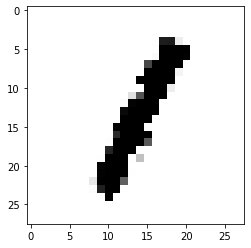

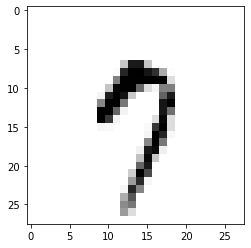

In [165]:
G.eval()
D.eval()


with torch.no_grad():
    samples = G.sampler(1)
    images = G(samples)
    print(D(images))
    
    digits_index = np.random.choice(train_data_pixels.numpy().shape[0],1)
    real_image = train_data_pixels[digits_index]
    print(D(real_image*2-1))
    display_images((images+1)/2)
    display_images(real_image)